# Gradual cut-off test of PS_Fullmodel_1step by LBNL (Slimming level 1)

Setteing

In [1]:
from sample_algorithm.onestepSim_LBNL import runQuantum
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [2]:
from transpiler.optimization import slim
example1 = slim.circuit_optimization( circuit=circuit_LBNL1, slim_level=1, work_register = 'w', cut='high')
circuit_LBNL1_op = example1.slim()
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [3]:
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

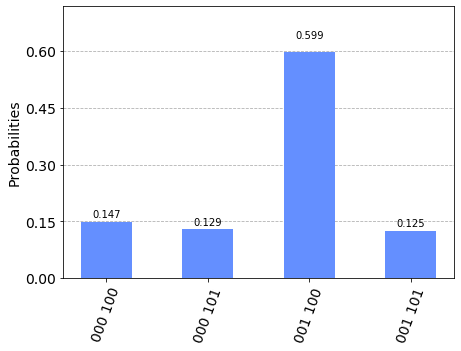

In [4]:
circuit=circuit_LBNL1
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts,number_to_keep=None)

In [34]:
from qiskit import IBMQ
from qiskit import *
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-utokyo',group='internal',project='icepp')
provider.backends(simulator=False)

/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-12-10 18:43:56,830: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q-utokyo', group='internal', project='icepp')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q-utokyo', group='internal', project='icepp')>,
 <IBMQBackend('ibmq_boeblingen') from IBMQ(hub='ibm-q-utokyo', group='internal', project='icepp')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q-utokyo', group='internal', project='icepp')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q-utokyo', group='internal', project='icepp')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-utokyo', group='internal', project='icepp')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-utokyo', group='internal', project='icepp')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q-utokyo', group='internal', project='icepp')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q-utokyo', group='internal', project='icepp')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-utokyo', group='internal', project='icepp')>,
 <IBMQBackend('ibmq_santiago') from

In [35]:
qc = 'ibmq_sydney'

## Measurement of bases by a Quantum computer (cutting-off noise bases)

In [7]:
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [8]:
backend = provider.get_backend(qc)
example1 = slim.circuit_optimization( circuit = circuit_LBNL1 , slim_level = 1, cut = ['high',None], work_register = 'w')
slimmed_by_qc, slimmed_dag = example1.slim_quantum(shots=8192 ,backend=backend)

               
  w_0: ────────
               
  w_1: ────────
               
  w_2: ────────
               
  w_3: ────────
               
 p0_0: ────────
               
 p0_1: ────────
       ┌───┐┌─┐
 p0_2: ┤ X ├┤M├
       └───┘└╥┘
 p1_0: ──────╫─
             ║ 
 p1_1: ──────╫─
             ║ 
 p1_2: ──────╫─
             ║ 
 h1_0: ──────╫─
             ║ 
  e_0: ──────╫─
             ║ 
phi_0: ──────╫─
             ║ 
  a_0: ──────╫─
             ║ 
  b_0: ──────╫─
             ║ 
 c1: 1/══════╩═
             0 
high: 4.742216854698199 mid: 3.5566626410236495 low: 2.3711084273490997
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'0': 287, '1': 7905}
Job Status: job has successfully run
Mitigated counts {'0': 1.8669452762646514e-09, '1': 8191.999999998133}
                              
  w_0: ───────────────────────
                              
  w_1: ───────────────────────
                              
  w_2: ───────────────────────
               

high: 2375.5421437040586 mid: 1484.7138398150366 low: 593.8855359260147
Cut-off line: 2375.5421437040586
Job Status: job has successfully run
Raw counts: {'00': 967, '01': 410, '10': 4840, '11': 1975}
Job Status: job has successfully run
Mitigated counts {'00': 607.1652126618047, '10': 5036.7121891565985, '11': 2548.122598182066}
                           ┌───┐               ┌───┐        
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├────────
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘        
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼──────────
                             │  └───┘  │  └─┬─┘  │          
  w_2: ──────────────────────┼─────────┼────┼────┼──────────
                             │         │    │    │          
  w_3: ──────────────────────┼─────────┼────┼────┼──────────
       ┌─────────────┐┌───┐  │         │    │    │  ┌───┐┌─┐
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼────┼────■──┤ X ├┤M├
       └────┬───┬────┘└┬─┬┘            │    │       └───┘└

high: 3321.1868146152347 mid: 2075.7417591345215 low: 830.2967036538087
Cut-off line: 3321.1868146152347
Job Status: job has successfully run
Raw counts: {'00': 634, '01': 4622, '10': 488, '11': 2448}
Job Status: job has successfully run
Mitigated counts {'00': 565.436658464736, '01': 4762.06587852671, '10': 436.0829709317186, '11': 2428.414492076837}
                           ┌───┐               ┌───┐     ┌───┐          
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├─────┤ X ├──■───────
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘     └─┬─┘┌─┴─┐     
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼─────────┼──┤ X ├──■──
                             │  └───┘  │  └─┬─┘  │         │  └───┘  │  
  w_2: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼──
                             │         │    │    │         │         │  
  w_3: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼──
       ┌─────────────┐┌───┐  │         │    │    │  ┌───┐  │  

high: 3648.477608041301 mid: 2736.358206030976 low: 1824.2388040206506
Cut-off line: 3648.477608041301
Job Status: job has successfully run
Raw counts: {'0': 4860, '1': 3332}
Job Status: job has successfully run
Mitigated counts {'0': 4923.241764590931, '1': 3268.7582354090687}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071

high: 3860.5926681219144 mid: 2412.8704175761964 low: 965.1481670304786
Cut-off line: 3860.5926681219144
Job Status: job has successfully run
Raw counts: {'00': 1302, '01': 3617, '10': 1062, '11': 2211}
Job Status: job has successfully run
Mitigated counts {'00': 1110.2212301058032, '01': 3678.08393193976, '10': 1029.7056266759098, '11': 2373.989211278528}
                              ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ───────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                              └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ─────────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                      ┌─┐       │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ───────────────┤M├───────┼─────────┼────────┼─────────┼─────────┼───────»
                      └╥┘       │         │        │         │         │       »
  w_3: ────────────────╫────────┼─────────┼────────┼─────────┼─────────┼──

high: 3390.0469373572823 mid: 2118.7793358483013 low: 847.5117343393206
Cut-off line: 3390.0469373572823
Job Status: job has successfully run
Raw counts: {'00': 1116, '01': 5308, '10': 331, '11': 1437}
Job Status: job has successfully run
Mitigated counts {'00': 636.2621324192344, '01': 5949.941851684293, '10': 170.7195461680615, '11': 1435.0764697284103}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌──────────

high: 3853.334477302131 mid: 2408.3340483138318 low: 963.3336193255327
Cut-off line: 3853.334477302131
Job Status: job has successfully run
Raw counts: {'00': 1356, '01': 4881, '10': 419, '11': 1536}
Job Status: job has successfully run
Mitigated counts {'00': 927.1854283206621, '01': 5316.3046270444875, '10': 276.0116372285082, '11': 1672.4983074063418}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────────

high: 3302.3934843713896 mid: 2063.9959277321186 low: 825.5983710928474
Cut-off line: 3302.3934843713896
Job Status: job has successfully run
Raw counts: {'00': 1598, '01': 2872, '10': 1516, '11': 2206}
Job Status: job has successfully run
Mitigated counts {'00': 1480.7885998102508, '01': 2936.3162817697767, '10': 1474.167696079297, '11': 2300.7274223406753}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────

Job Status: job has successfully run
Raw counts: {'00': 269, '01': 1398, '10': 772, '11': 5753}
Job Status: job has successfully run
Mitigated counts {'00': 228.91164542415734, '01': 1245.5767452576654, '10': 689.3494774366121, '11': 6028.162131881565}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼─────

Job Status: job has successfully run
Raw counts: {'00': 454, '01': 1708, '10': 801, '11': 5229}
Job Status: job has successfully run
Mitigated counts {'00': 408.29314601084303, '01': 1569.8974286706382, '10': 719.3394507042866, '11': 5494.469974614232}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼─────

high: 3391.4100965966 mid: 2119.631310372875 low: 847.85252414915
Cut-off line: 3391.4100965966
Job Status: job has successfully run
Raw counts: {'00': 843, '01': 567, '10': 4072, '11': 2710}
Job Status: job has successfully run
Mitigated counts {'00': 563.1251606965409, '10': 4207.297146004664, '11': 3421.5776932992944}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │    

high: 3458.742402834564 mid: 2594.0568021259232 low: 1729.371201417282
Cut-off line: 3458.742402834564
Job Status: job has successfully run
Raw counts: {'0': 4883, '1': 3309}
Job Status: job has successfully run
Mitigated counts {'0': 4858.710480460472, '1': 3333.289519539528}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071)

high: 3680.8279575929346 mid: 2300.517473495584 low: 920.2069893982336
Cut-off line: 3680.8279575929346
Job Status: job has successfully run
Raw counts: {'00': 854, '01': 576, '10': 4112, '11': 2650}
Job Status: job has successfully run
Mitigated counts {'00': 618.8441862474451, '01': 31.78405302993138, '10': 4425.444120619357, '11': 3115.927640103268}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────

high: 3634.6759792813955 mid: 2726.0069844610466 low: 1817.3379896406977
Cut-off line: 3634.6759792813955
Job Status: job has successfully run
Raw counts: {'0': 1121, '1': 7071}
Job Status: job has successfully run
Mitigated counts {'0': 1013.7291875628486, '1': 7178.270812437152}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1

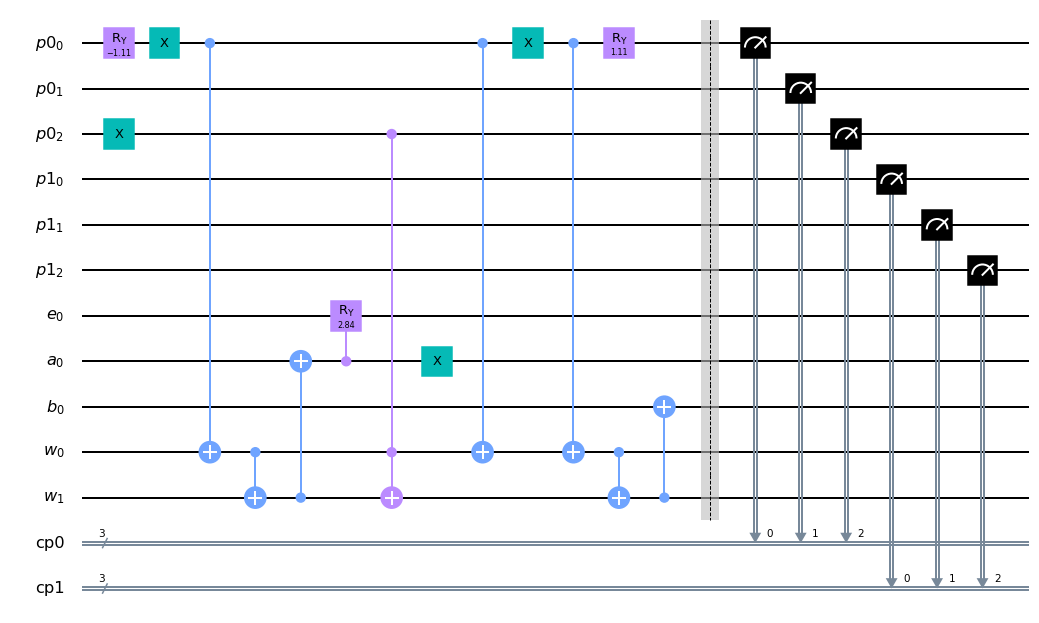

In [9]:
slimmed_by_qc.draw(output='mpl')

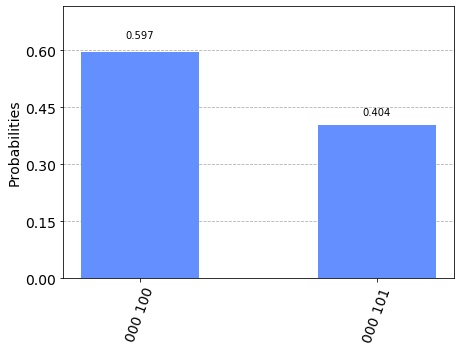

In [10]:
circuit=slimmed_by_qc
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=2000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts,number_to_keep=None)

In [11]:
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [12]:
backend = provider.get_backend(qc)
example2 = slim.circuit_optimization( circuit = circuit_LBNL1 , slim_level = 1, cut = ['mid',None], work_register = 'w')
slimmed_by_qc2, slimmed_dag2 = example2.slim_quantum(shots=8192 ,backend=backend)

               
  w_0: ────────
               
  w_1: ────────
               
  w_2: ────────
               
  w_3: ────────
               
 p0_0: ────────
               
 p0_1: ────────
       ┌───┐┌─┐
 p0_2: ┤ X ├┤M├
       └───┘└╥┘
 p1_0: ──────╫─
             ║ 
 p1_1: ──────╫─
             ║ 
 p1_2: ──────╫─
             ║ 
 h1_0: ──────╫─
             ║ 
  e_0: ──────╫─
             ║ 
phi_0: ──────╫─
             ║ 
  a_0: ──────╫─
             ║ 
  b_0: ──────╫─
             ║ 
 c1: 1/══════╩═
             0 
high: 4.742216854698199 mid: 3.5566626410236495 low: 2.3711084273490997
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'0': 259, '1': 7933}
Job Status: job has successfully run
Mitigated counts {'1': 8192.0}
                              
  w_0: ───────────────────────
                              
  w_1: ───────────────────────
                              
  w_2: ───────────────────────
                              
  w_3: ─────────────────

high: 2492.3346009756306 mid: 1557.7091256097692 low: 623.0836502439076
Cut-off line: 1557.7091256097692
Job Status: job has successfully run
Raw counts: {'00': 482, '01': 838, '10': 2637, '11': 4235}
Job Status: job has successfully run
Mitigated counts {'00': 151.62899884548202, '01': 1.8816995910768596e-09, '10': 2638.075675772779, '11': 5402.295325449872}
                           ┌───┐               ┌───┐        
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├────────
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘        
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼──────────
                             │  └───┘  │  └─┬─┘  │          
  w_2: ──────────────────────┼─────────┼────┼────┼──────────
                             │         │    │    │          
  w_3: ──────────────────────┼─────────┼────┼────┼──────────
       ┌─────────────┐┌───┐  │         │    │    │  ┌───┐┌─┐
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼────┼────■──┤ X ├┤M├
       └────┬───┬────┘└┬─┬┘ 

high: 3412.5120137078175 mid: 2132.820008567386 low: 853.1280034269544
Cut-off line: 2132.820008567386
Job Status: job has successfully run
Raw counts: {'00': 986, '01': 3980, '10': 586, '11': 2640}
Job Status: job has successfully run
Mitigated counts {'00': 870.2134205085433, '01': 4228.244910430415, '10': 460.837562068783, '11': 2632.704106992258}
                           ┌───┐               ┌───┐     ┌───┐               
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├─────┤ X ├──■─────────■──
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘     └─┬─┘┌─┴─┐     ┌─┴─┐
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼─────────┼──┤ X ├──■──┤ X ├
                             │  └───┘  │  └─┬─┘  │         │  └───┘  │  └───┘
  w_2: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
                             │         │    │    │         │         │       
  w_3: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
       ┌─────────────┐┌

high: 3550.3296012215033 mid: 2662.7472009161274 low: 1775.1648006107516
Cut-off line: 2662.7472009161274
Job Status: job has successfully run
Raw counts: {'0': 4601, '1': 3591}
Job Status: job has successfully run
Mitigated counts {'0': 4552.938374536867, '1': 3639.061625463133}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.10

high: 3888.5573149375487 mid: 2430.348321835968 low: 972.1393287343872
Cut-off line: 2430.348321835968
Job Status: job has successfully run
Raw counts: {'00': 267, '01': 1339, '10': 1196, '11': 5390}
Job Status: job has successfully run
Mitigated counts {'00': 116.51774441905576, '01': 1393.456945079682, '10': 663.1855277487682, '11': 6018.839782752495}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────────

high: 4074.5280600158494 mid: 3055.896045011887 low: 2037.2640300079247
Cut-off line: 3055.896045011887
Job Status: job has successfully run
Raw counts: {'0': 283, '1': 7909}
Job Status: job has successfully run
Mitigated counts {'0': 77.58556217114496, '1': 8114.414437828856}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
            ┌───┐            │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ─────┤ X ├────────────┼─────────┼────────┼─────────┼─────────┼───────»
            └───┘            │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071)

high: 4449.8287719489945 mid: 2781.1429824681218 low: 1112.4571929872486
Cut-off line: 2781.1429824681218
Job Status: job has successfully run
Raw counts: {'00': 337, '01': 1490, '10': 1176, '11': 5189}
Job Status: job has successfully run
Mitigated counts {'00': 180.93976615429088, '01': 1443.3342134898687, '10': 743.1218378631413, '11': 5824.604182492699}
                           ┌───┐                        ┌───┐          ┌───┐»
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├──────────┤ X ├»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘          └─┬─┘»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼──────────────┼──»
            ┌───┐            │  └───┘  │      └─┬─┘       │  ┌───┐       │  »
  w_2: ─────┤ X ├────────────┼─────────┼────────┼─────────┼──┤ X ├───────┼──»
            └───┘            │         │        │         │  └─┬─┘       │  »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼────┼─────────┼──»
       ┌────────

high: 4135.589663679522 mid: 2584.7435397997015 low: 1033.8974159198806
Cut-off line: 2584.7435397997015
Job Status: job has successfully run
Raw counts: {'00': 2642, '01': 3091, '10': 1355, '11': 1104}
Job Status: job has successfully run
Mitigated counts {'00': 2417.366377888422, '01': 3334.9510174603947, '10': 1262.0946679614292, '11': 1177.5879366897543}
                           ┌───┐                        ┌───┐          ┌───┐»
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├──────────┤ X ├»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘          └─┬─┘»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼──────────────┼──»
            ┌───┐            │  └───┘  │      └─┬─┘       │  ┌───┐       │  »
  w_2: ─────┤ X ├────────────┼─────────┼────────┼─────────┼──┤ X ├───────┼──»
            └───┘            │         │        │         │  └─┬─┘       │  »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼────┼─────────┼──»
       ┌───────

high: 4418.032722930412 mid: 2761.2704518315077 low: 1104.508180732603
Cut-off line: 2761.2704518315077
Job Status: job has successfully run
Raw counts: {'00': 1188, '01': 4955, '10': 740, '11': 1309}
Job Status: job has successfully run
Mitigated counts {'00': 1080.9735681592392, '01': 5094.477648775364, '10': 711.6556510987226, '11': 1304.8931319666738}
                           ┌───┐                        ┌───┐             ┌───┐»
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────────────┤ X ├»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘             └─┬─┘»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────────────┼──»
            ┌───┐            │  └───┘  │      └─┬─┘       │  ┌───┐     ┌─┐  │  »
  w_2: ─────┤ X ├────────────┼─────────┼────────┼─────────┼──┤ X ├─────┤M├──┼──»
            └───┘            │         │        │         │  └─┬─┘     └╥┘  │  »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼────┼────────╫──

high: 4248.050829700819 mid: 2655.031768563012 low: 1062.0127074252048
Cut-off line: 2655.031768563012
Job Status: job has successfully run
Raw counts: {'00': 971, '01': 5215, '10': 629, '11': 1377}
Job Status: job has successfully run
Mitigated counts {'00': 829.274582221347, '01': 5387.640367834867, '10': 595.5882610696221, '11': 1379.4967888741635}
                           ┌───┐                        ┌───┐          ┌───┐»
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├──────────┤ X ├»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘          └─┬─┘»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼──────────────┼──»
            ┌───┐            │  └───┘  │      └─┬─┘       │  ┌───┐       │  »
  w_2: ─────┤ X ├────────────┼─────────┼────────┼─────────┼──┤ X ├───────┼──»
            └───┘            │         │        │         │  └─┬─┘       │  »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼────┼─────────┼──»
       ┌─────────────┐

high: 4452.809948977056 mid: 2783.0062181106596 low: 1113.202487244264
Cut-off line: 2783.0062181106596
Job Status: job has successfully run
Raw counts: {'00': 1678, '01': 3305, '10': 2004, '11': 1205}
Job Status: job has successfully run
Mitigated counts {'00': 1412.3732959227953, '01': 3565.9310765141213, '10': 2023.410933565266, '11': 1190.2846939978176}
                           ┌───┐                        ┌───┐          ┌───┐»
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├──────────┤ X ├»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘          └─┬─┘»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼──────────────┼──»
            ┌───┐            │  └───┘  │      └─┬─┘       │  ┌───┐       │  »
  w_2: ─────┤ X ├────────────┼─────────┼────────┼─────────┼──┤ X ├───────┼──»
            └───┘            │         │        │         │  └─┬─┘       │  »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼────┼─────────┼──»
       ┌────────

high: 4375.670026152653 mid: 2734.793766345408 low: 1093.9175065381633
Cut-off line: 2734.793766345408
Job Status: job has successfully run
Raw counts: {'00': 655, '01': 2352, '10': 912, '11': 4273}
Job Status: job has successfully run
Mitigated counts {'00': 588.7924327565297, '01': 2278.3966042172933, '10': 827.9885257625741, '11': 4496.822437263603}
                           ┌───┐                        ┌───┐          ┌───┐»
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├──────────┤ X ├»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘          └─┬─┘»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼──────────────┼──»
            ┌───┐            │  └───┘  │      └─┬─┘       │  ┌───┐       │  »
  w_2: ─────┤ X ├────────────┼─────────┼────────┼─────────┼──┤ X ├───────┼──»
            └───┘            │         │        │         │  └─┬─┘       │  »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼────┼─────────┼──»
       ┌─────────────

high: 4384.232408180043 mid: 2740.145255112527 low: 1096.0581020450109
Cut-off line: 2740.145255112527
Job Status: job has successfully run
Raw counts: {'00': 763, '01': 2258, '10': 1087, '11': 4084}
Job Status: job has successfully run
Mitigated counts {'00': 677.13032747056, '01': 2194.045188867689, '10': 992.1083648012307, '11': 4328.71611886052}
                           ┌───┐                        ┌───┐          ┌───┐»
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├──────────┤ X ├»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘          └─┬─┘»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼──────────────┼──»
            ┌───┐            │  └───┘  │      └─┬─┘       │  ┌───┐       │  »
  w_2: ─────┤ X ├────────────┼─────────┼────────┼─────────┼──┤ X ├───────┼──»
            └───┘            │         │        │         │  └─┬─┘       │  »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼────┼─────────┼──»
       ┌─────────────┐┌─

high: 4079.440018217889 mid: 2549.6500113861803 low: 1019.8600045544722
Cut-off line: 2549.6500113861803
Job Status: job has successfully run
Raw counts: {'00': 935, '01': 565, '10': 4221, '11': 2471}
Job Status: job has successfully run
Mitigated counts {'00': 657.2108065098449, '10': 4514.196680265058, '11': 3020.5925132250977}
                           ┌───┐                        ┌───┐          ┌───┐»
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├──────────┤ X ├»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘          └─┬─┘»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼──────────────┼──»
            ┌───┐            │  └───┘  │      └─┬─┘       │  ┌───┐       │  »
  w_2: ─────┤ X ├────────────┼─────────┼────────┼─────────┼──┤ X ├───────┼──»
            └───┘            │         │        │         │  └─┬─┘       │  »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼────┼─────────┼──»
       ┌─────────────┐┌───┐  │         │    

high: 4370.143303067203 mid: 3277.6074773004025 low: 2185.0716515336017
Cut-off line: 3277.6074773004025
Job Status: job has successfully run
Raw counts: {'0': 6378, '1': 1814}
Job Status: job has successfully run
Mitigated counts {'0': 6420.97938662637, '1': 1771.02061337363}
                           ┌───┐                        ┌───┐          ┌───┐»
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├──────────┤ X ├»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘          └─┬─┘»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼──────────────┼──»
            ┌───┐            │  └───┘  │      └─┬─┘       │  ┌───┐       │  »
  w_2: ─────┤ X ├────────────┼─────────┼────────┼─────────┼──┤ X ├───────┼──»
            └───┘            │         │        │         │  └─┬─┘       │  »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼────┼─────────┼──»
       ┌─────────────┐┌───┐  │         │        │         │    │  ┌───┐  │  »
 p0_0: ┤ RY(-1.1071)

high: 4441.884799156644 mid: 2776.1779994729022 low: 1110.471199789161
Cut-off line: 2776.1779994729022
Job Status: job has successfully run
Raw counts: {'00': 766, '01': 523, '10': 4087, '11': 2816}
Job Status: job has successfully run
Mitigated counts {'10': 4890.217942130749, '11': 3301.78205789671}
                           ┌───┐                        ┌───┐          ┌───┐»
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├──────────┤ X ├»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘          └─┬─┘»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼──────────────┼──»
            ┌───┐            │  └───┘  │      └─┬─┘       │  ┌───┐       │  »
  w_2: ─────┤ X ├────────────┼─────────┼────────┼─────────┼──┤ X ├───────┼──»
            └───┘            │         │        │         │  └─┬─┘       │  »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼────┼─────────┼──»
       ┌─────────────┐┌───┐  │         │        │         │    │  ┌───┐ 

high: 4428.2059090206385 mid: 3321.154431765479 low: 2214.1029545103193
Cut-off line: 3321.154431765479
Job Status: job has successfully run
Raw counts: {'0': 1399, '1': 6793}
Job Status: job has successfully run
Mitigated counts {'0': 1210.4767918935124, '1': 6981.523208106488}
                           ┌───┐                        ┌───┐          ┌───┐»
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├──────────┤ X ├»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘          └─┬─┘»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼──────────────┼──»
            ┌───┐            │  └───┘  │      └─┬─┘       │  ┌───┐       │  »
  w_2: ─────┤ X ├────────────┼─────────┼────────┼─────────┼──┤ X ├───────┼──»
            └───┘            │         │        │         │  └─┬─┘       │  »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼────┼─────────┼──»
       ┌─────────────┐┌───┐  │         │        │         │    │  ┌───┐  │  »
 p0_0: ┤ RY(-1.107

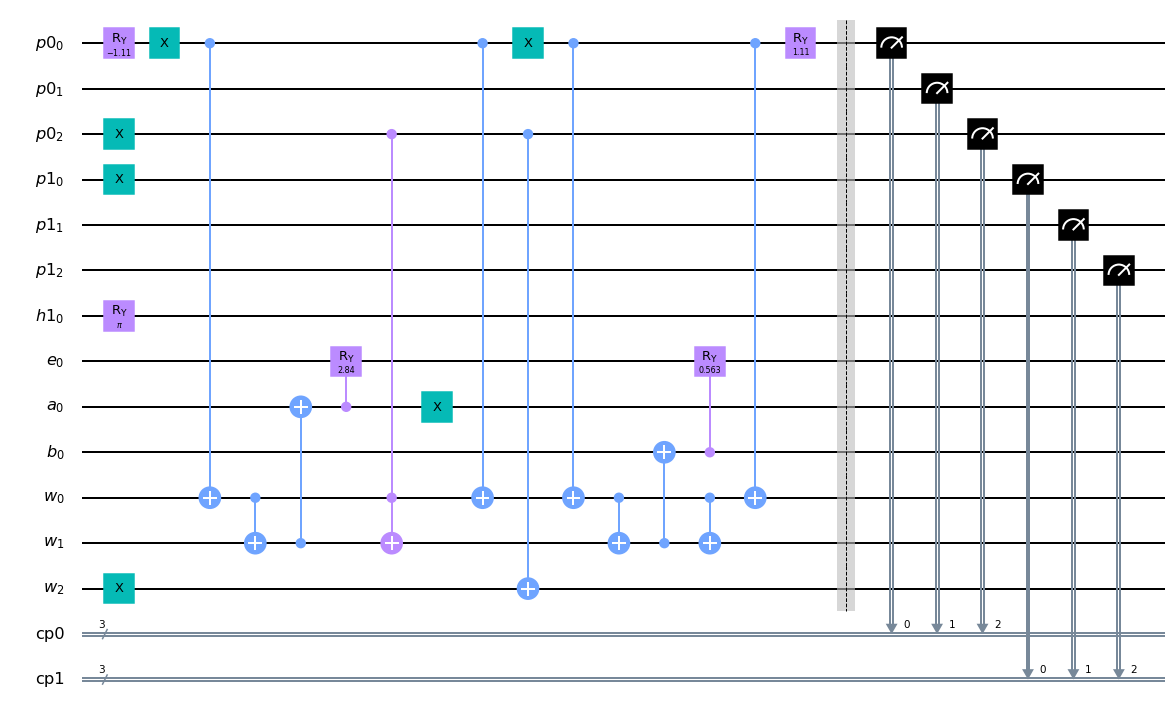

In [13]:
slimmed_by_qc2.draw(output='mpl')

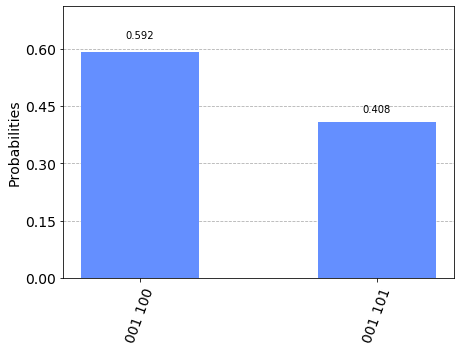

In [14]:
circuit=slimmed_by_qc2
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=2000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts,number_to_keep=None)

In [15]:
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [16]:
backend = provider.get_backend(qc)
example3 = slim.circuit_optimization( circuit = circuit_LBNL1 , slim_level = 1, cut = ['low',None], work_register = 'w')
slimmed_by_qc3, slimmed_dag3 = example3.slim_quantum(shots=8192 ,backend=backend)

               
  w_0: ────────
               
  w_1: ────────
               
  w_2: ────────
               
  w_3: ────────
               
 p0_0: ────────
               
 p0_1: ────────
       ┌───┐┌─┐
 p0_2: ┤ X ├┤M├
       └───┘└╥┘
 p1_0: ──────╫─
             ║ 
 p1_1: ──────╫─
             ║ 
 p1_2: ──────╫─
             ║ 
 h1_0: ──────╫─
             ║ 
  e_0: ──────╫─
             ║ 
phi_0: ──────╫─
             ║ 
  a_0: ──────╫─
             ║ 
  b_0: ──────╫─
             ║ 
 c1: 1/══════╩═
             0 
high: 4.742216854698199 mid: 3.5566626410236495 low: 2.3711084273490997
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'0': 269, '1': 7923}
Job Status: job has successfully run
Mitigated counts {'1': 8192.0}
                              
  w_0: ───────────────────────
                              
  w_1: ───────────────────────
                              
  w_2: ───────────────────────
                              
  w_3: ─────────────────

high: 360.4275734579114 mid: 225.26723341119464 low: 90.10689336447786
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'00': 128, '01': 276, '10': 2513, '11': 5275}
Job Status: job has successfully run
Mitigated counts {'00': 4.3395216881911953e-10, '01': 2.3929805530234232e-09, '10': 2524.3541763688713, '11': 5667.645823628301}
                           ┌───┐               ┌───┐        
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├────────
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘        
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼──────────
                             │  └───┘  │  └───┘  │          
  w_2: ──────────────────────┼─────────┼─────────┼──────────
                             │         │         │          
  w_3: ──────────────────────┼─────────┼─────────┼──────────
       ┌─────────────┐┌───┐  │         │         │  ┌───┐┌─┐
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼─────────■──┤ X ├┤M├
       └────┬───┬────┘└┬─┬┘          

high: 380.83644593068857 mid: 238.02277870668036 low: 95.20911148267214
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'00': 952, '01': 4903, '10': 342, '11': 1995}
Job Status: job has successfully run
Mitigated counts {'00': 425.5832930895004, '01': 5385.79187090996, '10': 131.10417697637794, '11': 2249.520659024161}
                           ┌───┐               ┌───┐     ┌───┐               
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├─────┤ X ├──■─────────■──
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘     └─┬─┘┌─┴─┐     ┌─┴─┐
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼─────────┼──┤ X ├──■──┤ X ├
                             │  └───┘  │  └───┘  │         │  └───┘  │  └───┘
  w_2: ──────────────────────┼─────────┼─────────┼─────────┼─────────┼───────
                             │         │         │         │         │       
  w_3: ──────────────────────┼─────────┼─────────┼─────────┼─────────┼───────
       ┌─────────────┐┌───┐  │   

high: 709.8836336662807 mid: 532.4127252497105 low: 354.94181683314036
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'0': 5770, '1': 2422}
Job Status: job has successfully run
Mitigated counts {'0': 5605.168503091671, '1': 2586.8314969083303}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │                  │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─

high: 4209.191549069867 mid: 2630.7447181686666 low: 1052.2978872674666
Cut-off line: 1052.2978872674666
Job Status: job has successfully run
Raw counts: {'00': 687, '01': 3742, '10': 559, '11': 3204}
Job Status: job has successfully run
Mitigated counts {'00': 401.2479200736776, '01': 3863.3750603260614, '10': 329.88148862456535, '11': 3597.4955309756965}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌─────────

high: 4974.7777162641305 mid: 3731.083287198098 low: 2487.3888581320653
Cut-off line: 2487.3888581320653
Job Status: job has successfully run
Raw counts: {'0': 4450, '1': 3742}
Job Status: job has successfully run
Mitigated counts {'0': 4286.444632626372, '1': 3905.5553673736276}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │                  │  ┌───┐  │       »
 p0_0: ┤ RY(-1.10

high: 5204.650360164198 mid: 3252.9064751026235 low: 1301.1625900410495
Cut-off line: 1301.1625900410495
Job Status: job has successfully run
Raw counts: {'00': 343, '01': 4166, '10': 295, '11': 3388}
Job Status: job has successfully run
Mitigated counts {'00': 210.76710305625974, '01': 4148.239173298083, '10': 193.39097174628455, '11': 3639.6027518993724}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌─────────

high: 5776.058855588868 mid: 3610.0367847430425 low: 1444.014713897217
Cut-off line: 1444.014713897217
Job Status: job has successfully run
Raw counts: {'00': 1960, '01': 2517, '10': 2503, '11': 1212}
Job Status: job has successfully run
Mitigated counts {'00': 1812.2116284348922, '01': 2649.4831316261057, '10': 2473.003501604765, '11': 1257.3017383342376}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌─────────

high: 5488.6388851705 mid: 3430.399303231562 low: 1372.159721292625
Cut-off line: 1372.159721292625
Job Status: job has successfully run
Raw counts: {'00': 847, '01': 3841, '10': 547, '11': 2957}
Job Status: job has successfully run
Mitigated counts {'00': 805.672682065105, '01': 3797.368265292808, '10': 519.3260457416644, '11': 3069.633006900422}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌─────────────┐┌───

high: 5937.337600400053 mid: 3710.836000250033 low: 1484.3344001000132
Cut-off line: 1484.3344001000132
Job Status: job has successfully run
Raw counts: {'00': 1455, '01': 3644, '10': 766, '11': 2327}
Job Status: job has successfully run
Mitigated counts {'00': 1390.0128129609145, '01': 3634.5834173682165, '10': 747.5403804028464, '11': 2419.863389268023}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌──────────

high: 5928.35957962663 mid: 3705.224737266644 low: 1482.0898949066575
Cut-off line: 1482.0898949066575
Job Status: job has successfully run
Raw counts: {'00': 2091, '01': 2315, '10': 2374, '11': 1412}
Job Status: job has successfully run
Mitigated counts {'00': 1969.0180637882968, '01': 2414.66189235439, '10': 2342.6177415337397, '11': 1465.7023023235736}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌──────────

high: 6025.21317581617 mid: 3765.7582348851065 low: 1506.3032939540426
Cut-off line: 1506.3032939540426
Job Status: job has successfully run
Raw counts: {'00': 858, '01': 2938, '10': 986, '11': 3410}
Job Status: job has successfully run
Mitigated counts {'00': 800.4845797339099, '01': 2887.0515083408927, '10': 953.422944626326, '11': 3551.040967298872}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌─────────────

high: 6302.226380122934 mid: 3938.8914875768337 low: 1575.5565950307334
Cut-off line: 1575.5565950307334
Job Status: job has successfully run
Raw counts: {'00': 922, '01': 3215, '10': 916, '11': 3139}
Job Status: job has successfully run
Mitigated counts {'00': 856.8646324722481, '01': 3199.9014280905963, '10': 877.0949645198172, '11': 3258.1389749173386}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌──────────

high: 6150.344110772342 mid: 3843.9650692327136 low: 1537.5860276930855
Cut-off line: 1537.5860276930855
Job Status: job has successfully run
Raw counts: {'00': 1444, '01': 1350, '10': 2818, '11': 2580}
Job Status: job has successfully run
Mitigated counts {'00': 1324.760382979384, '01': 1234.8198574244966, '10': 2913.2505589472134, '11': 2719.1692006489066}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌───────

Job Status: job has successfully run
Raw counts: {'00': 1344, '01': 2489, '10': 1524, '11': 2835}
Job Status: job has successfully run
Mitigated counts {'00': 1252.533024172054, '01': 2543.3734499091524, '10': 1434.920943592951, '11': 2961.172582325844}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │                  │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼────

high: 6412.737010022559 mid: 4809.552757516919 low: 3206.3685050112795
Cut-off line: 3206.3685050112795
Job Status: job has successfully run
Raw counts: {'0': 4077, '1': 4115}
Job Status: job has successfully run
Mitigated counts {'0': 4071.7755128402455, '1': 4120.224487159754}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │                  │  ┌───┐  │       »
 p0_0: ┤ RY(-1.107

high: 6604.342895177714 mid: 4127.714309486071 low: 1651.0857237944285
Cut-off line: 1651.0857237944285
Job Status: job has successfully run
Raw counts: {'00': 2135, '01': 2913, '10': 1286, '11': 1858}
Job Status: job has successfully run
Mitigated counts {'00': 2152.714738623295, '01': 2955.262338101548, '10': 1226.5136870299928, '11': 1857.5092362451644}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌─────────

high: 6483.235284110204 mid: 4052.0220525688774 low: 1620.808821027551
Cut-off line: 1620.808821027551
Job Status: job has successfully run
Raw counts: {'00': 1534, '01': 1383, '10': 2736, '11': 2539}
Job Status: job has successfully run
Mitigated counts {'00': 1439.024820369337, '01': 1301.646884977197, '10': 2795.1627472431783, '11': 2656.1655474102877}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌──────────

high: 6767.885265414989 mid: 5075.9139490612415 low: 3383.9426327074943
Cut-off line: 3383.9426327074943
Job Status: job has successfully run
Raw counts: {'0': 4560, '1': 3632}
Job Status: job has successfully run
Mitigated counts {'0': 5200.188499578065, '1': 2991.811500421936}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │                  │  ┌───┐  │       »
 p0_0: ┤ RY(-1.107

high: 6669.825914916242 mid: 5002.369436187182 low: 3334.912957458121
Cut-off line: 3334.912957458121
Job Status: job has successfully run
Raw counts: {'0': 2235, '1': 5957}
Job Status: job has successfully run
Mitigated counts {'0': 2132.5599194356932, '1': 6059.440080564307}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
                             │         │                  │         │       »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │                  │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071)

high: 6622.094754556806 mid: 4966.571065917605 low: 3311.047377278403
Cut-off line: 3311.047377278403
Job Status: job has successfully run
Raw counts: {'0': 6990, '1': 1202}
Job Status: job has successfully run
Mitigated counts {'0': 7015.106649938156, '1': 1176.893350061845}


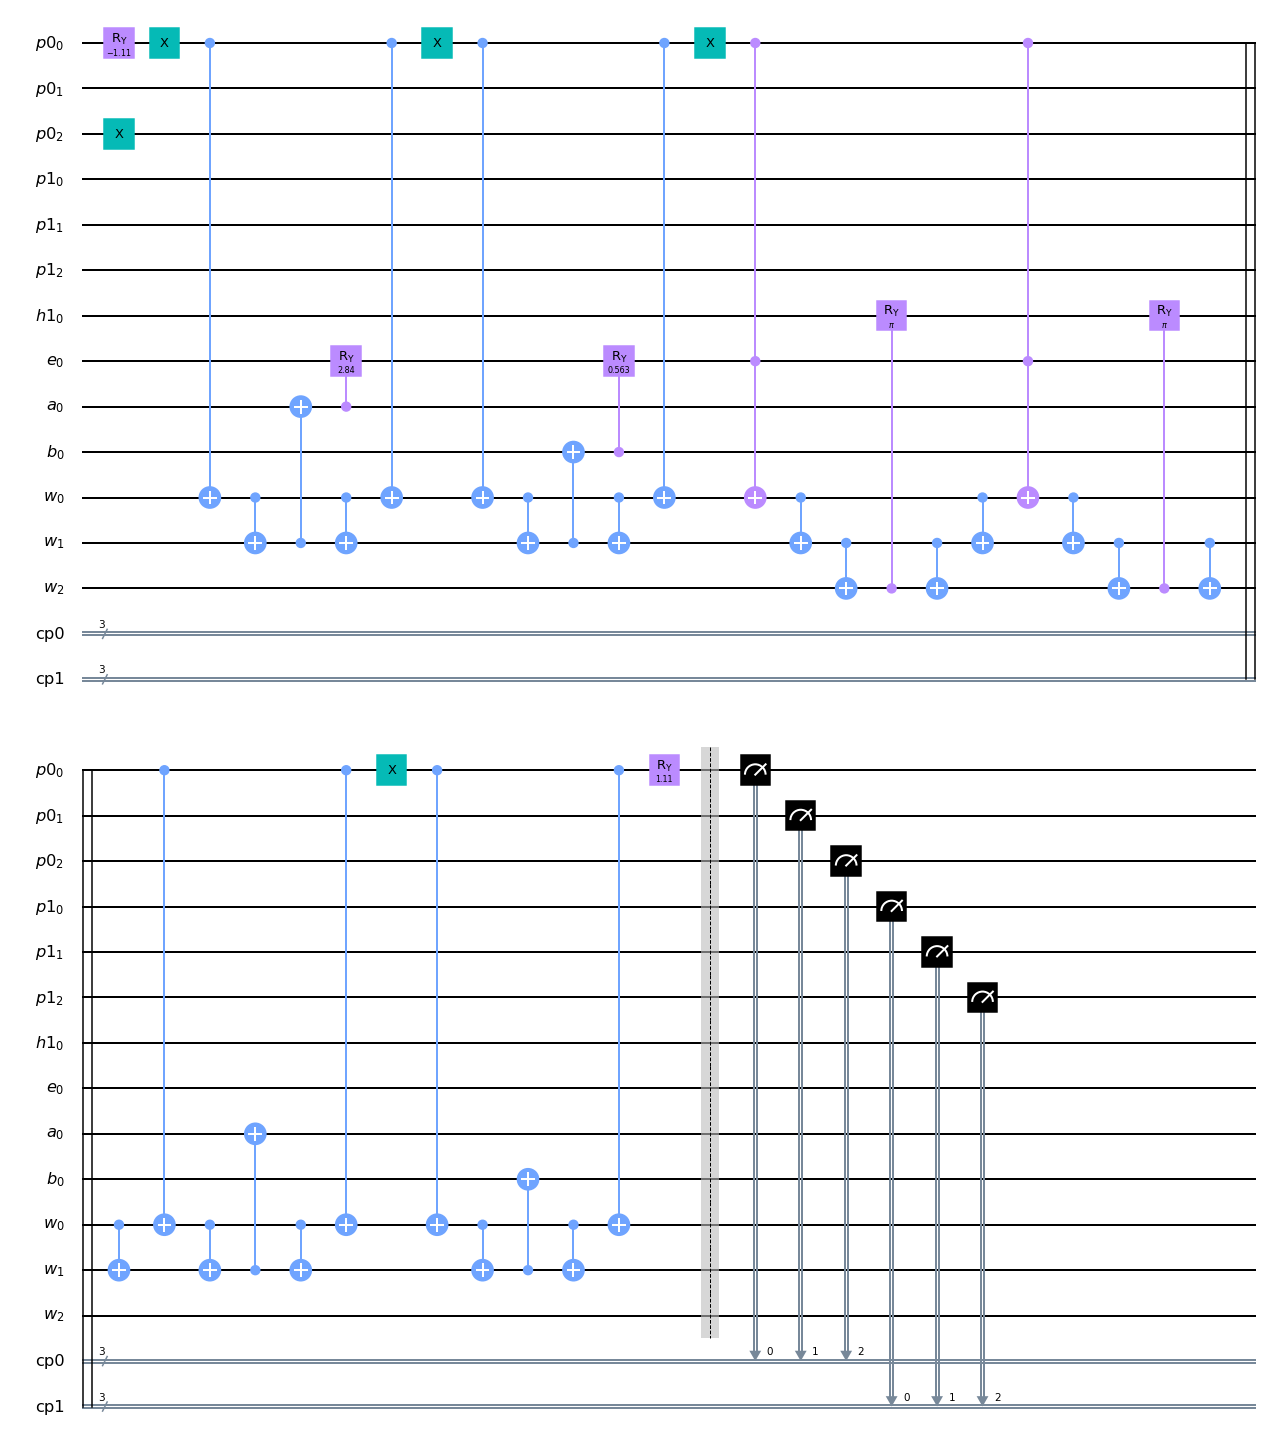

In [17]:
slimmed_by_qc3.draw(output='mpl')

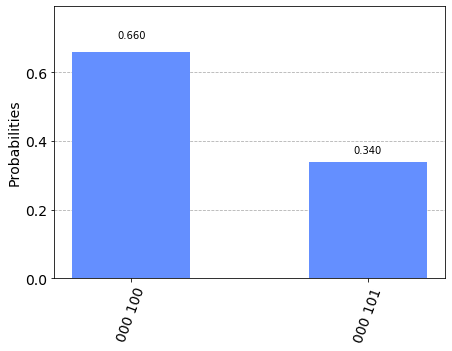

In [18]:
circuit=slimmed_by_qc3
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=2000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts,number_to_keep=None)

In [21]:
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [22]:
backend = provider.get_backend(qc)
example3_2 = slim.circuit_optimization( circuit = circuit_LBNL1 , slim_level = 1, cut = ['low',None], work_register = 'w')
slimmed_by_qc3_2, slimmed_dag3_2 = example3_2.slim_quantum(shots=8192 ,backend=backend)

               
  w_0: ────────
               
  w_1: ────────
               
  w_2: ────────
               
  w_3: ────────
               
 p0_0: ────────
               
 p0_1: ────────
       ┌───┐┌─┐
 p0_2: ┤ X ├┤M├
       └───┘└╥┘
 p1_0: ──────╫─
             ║ 
 p1_1: ──────╫─
             ║ 
 p1_2: ──────╫─
             ║ 
 h1_0: ──────╫─
             ║ 
  e_0: ──────╫─
             ║ 
phi_0: ──────╫─
             ║ 
  a_0: ──────╫─
             ║ 
  b_0: ──────╫─
             ║ 
 c1: 1/══════╩═
             0 
high: 4.742216854698199 mid: 3.5566626410236495 low: 2.3711084273490997
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'0': 299, '1': 7893}
Job Status: job has successfully run
Mitigated counts {'0': 4.577547961029686e-09, '1': 8191.9999999954225}
                              
  w_0: ───────────────────────
                              
  w_1: ───────────────────────
                              
  w_2: ───────────────────────
               

high: 2375.5421437040586 mid: 1484.7138398150366 low: 593.8855359260147
Cut-off line: 593.8855359260147
Job Status: job has successfully run
Raw counts: {'00': 666, '01': 1044, '10': 2605, '11': 3877}
Job Status: job has successfully run
Mitigated counts {'00': 63.10752368829399, '01': 6.689955252126861, '10': 3030.3620979523994, '11': 5091.84042310718}
                           ┌───┐               ┌───┐        
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├────────
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘        
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼──────────
                             │  └───┘  │  └─┬─┘  │          
  w_2: ──────────────────────┼─────────┼────┼────┼──────────
                             │         │    │    │          
  w_3: ──────────────────────┼─────────┼────┼────┼──────────
       ┌─────────────┐┌───┐  │         │    │    │  ┌───┐┌─┐
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼────┼────■──┤ X ├┤M├
       └────┬───┬────┘└┬─┬┘       

high: 3449.4524225437635 mid: 2155.907764089852 low: 862.3631056359409
Cut-off line: 862.3631056359409
Job Status: job has successfully run
Raw counts: {'00': 684, '01': 4569, '10': 413, '11': 2526}
Job Status: job has successfully run
Mitigated counts {'00': 621.6365381262427, '01': 4671.19657302882, '10': 353.92315062231074, '11': 2545.2437382226267}
                           ┌───┐               ┌───┐     ┌───┐               
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├─────┤ X ├──■─────────■──
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘     └─┬─┘┌─┴─┐     ┌─┴─┐
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼─────────┼──┤ X ├──■──┤ X ├
                             │  └───┘  │  └─┬─┘  │         │  └───┘  │  └───┘
  w_2: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
                             │         │    │    │         │         │       
  w_3: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
       ┌─────────────

high: 3947.8812227735643 mid: 2960.910917080173 low: 1973.9406113867822
Cut-off line: 1973.9406113867822
Job Status: job has successfully run
Raw counts: {'0': 4685, '1': 3507}
Job Status: job has successfully run
Mitigated counts {'0': 4656.265215742918, '1': 3535.7347842570816}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.10

high: 4733.7894352200365 mid: 2958.618397012523 low: 1183.4473588050091
Cut-off line: 1183.4473588050091
Job Status: job has successfully run
Raw counts: {'00': 676, '01': 3913, '10': 570, '11': 3033}
Job Status: job has successfully run
Mitigated counts {'00': 173.05269277974557, '01': 4364.207731981869, '10': 180.8320479243387, '11': 3473.907527314047}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────────

high: 5790.369426529774 mid: 4342.77706989733 low: 2895.184713264887
Cut-off line: 2895.184713264887
Job Status: job has successfully run
Raw counts: {'0': 4424, '1': 3768}
Job Status: job has successfully run
Mitigated counts {'0': 4208.153019783122, '1': 3983.8469802168784}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) 

high: 5870.798909742158 mid: 3669.249318588849 low: 1467.6997274355394
Cut-off line: 1467.6997274355394
Job Status: job has successfully run
Raw counts: {'00': 867, '01': 3350, '10': 849, '11': 3126}
Job Status: job has successfully run
Mitigated counts {'00': 485.5542554659201, '01': 3681.223696856544, '10': 531.8292462060456, '11': 3493.3928014714907}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────────

high: 6507.52227014769 mid: 4067.201418842306 low: 1626.8805675369224
Cut-off line: 1626.8805675369224
Job Status: job has successfully run
Raw counts: {'00': 2964, '01': 936, '10': 3416, '11': 876}
Job Status: job has successfully run
Mitigated counts {'00': 2903.461623837323, '01': 934.9399107842167, '10': 3492.130281791075, '11': 861.4681835873857}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐

high: 6123.330782183181 mid: 3827.081738864488 low: 1530.8326955457953
Cut-off line: 1530.8326955457953
Job Status: job has successfully run
Raw counts: {'00': 2479, '01': 1735, '10': 2319, '11': 1659}
Job Status: job has successfully run
Mitigated counts {'00': 2399.407802819048, '01': 1799.2536972525434, '10': 2238.330976315793, '11': 1755.007523612616}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌──────────

high: 6433.840204661687 mid: 4021.150127913554 low: 1608.4600511654216
Cut-off line: 1608.4600511654216
Job Status: job has successfully run
Raw counts: {'00': 1315, '01': 3636, '10': 1001, '11': 2240}
Job Status: job has successfully run
Mitigated counts {'00': 1162.0896064689275, '01': 3614.4777207309203, '10': 984.487351817196, '11': 2430.9453209829558}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────

high: 6521.487380440228 mid: 4075.9296127751422 low: 1630.371845110057
Cut-off line: 1630.371845110057
Job Status: job has successfully run
Raw counts: {'00': 2027, '01': 2724, '10': 2336, '11': 1105}
Job Status: job has successfully run
Mitigated counts {'00': 1901.6565624609416, '01': 2722.2398267998365, '10': 2465.049167253765, '11': 1103.0544434854569}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────

high: 6780.15586713239 mid: 4237.597416957744 low: 1695.0389667830975
Cut-off line: 1695.0389667830975
Job Status: job has successfully run
Raw counts: {'00': 1998, '01': 1760, '10': 2340, '11': 2094}
Job Status: job has successfully run
Mitigated counts {'00': 1949.499514002301, '01': 1748.0001967009703, '10': 2346.425268241623, '11': 2148.0750210551046}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌──────────

high: 6804.015945465389 mid: 4252.509965915869 low: 1701.0039863663474
Cut-off line: 1701.0039863663474
Job Status: job has successfully run
Raw counts: {'00': 2689, '01': 1456, '10': 2511, '11': 1536}
Job Status: job has successfully run
Mitigated counts {'00': 2587.338626195234, '01': 1394.9037365993793, '10': 2578.5954837243453, '11': 1631.162153481042}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────

high: 7136.479493261372 mid: 4460.299683288357 low: 1784.119873315343
Cut-off line: 1784.119873315343
Job Status: job has successfully run
Raw counts: {'00': 1081, '01': 1282, '10': 2540, '11': 3289}
Job Status: job has successfully run
Mitigated counts {'00': 1001.6055648576519, '01': 541.9490768194296, '10': 2629.5854086206386, '11': 4018.85994970228}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────────

high: 7160.0228798527005 mid: 5370.017159889525 low: 3580.0114399263502
Cut-off line: 3580.0114399263502
Job Status: job has successfully run
Raw counts: {'0': 4371, '1': 3821}
Job Status: job has successfully run
Mitigated counts {'0': 4194.182617631305, '1': 3997.8173823686952}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.10

high: 7252.051011197657 mid: 4532.531881998536 low: 1813.0127527994143
Cut-off line: 1813.0127527994143
Job Status: job has successfully run
Raw counts: {'00': 868, '01': 2245, '10': 1433, '11': 3646}
Job Status: job has successfully run
Mitigated counts {'00': 675.3436052413091, '01': 2073.799306496912, '10': 1352.3007310103371, '11': 4090.556357251442}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────────

high: 7413.6646666292145 mid: 5560.248499971911 low: 3706.8323333146072
Cut-off line: 3706.8323333146072
Job Status: job has successfully run
Raw counts: {'0': 5132, '1': 3060}
Job Status: job has successfully run
Mitigated counts {'0': 4916.964346918887, '1': 3275.0356530811137}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.10

high: 7447.247401324145 mid: 5585.435550993109 low: 3723.6237006620727
Cut-off line: 3723.6237006620727
Job Status: job has successfully run
Raw counts: {'0': 4696, '1': 3496}
Job Status: job has successfully run
Mitigated counts {'0': 4171.008723084121, '1': 4020.991276915879}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071

high: 7353.97133150169 mid: 5515.4784986262675 low: 3676.985665750845
Cut-off line: 3676.985665750845
Job Status: job has successfully run
Raw counts: {'0': 7838, '1': 354}
Job Status: job has successfully run
Mitigated counts {'0': 7883.487181516787, '1': 308.5128184832125}


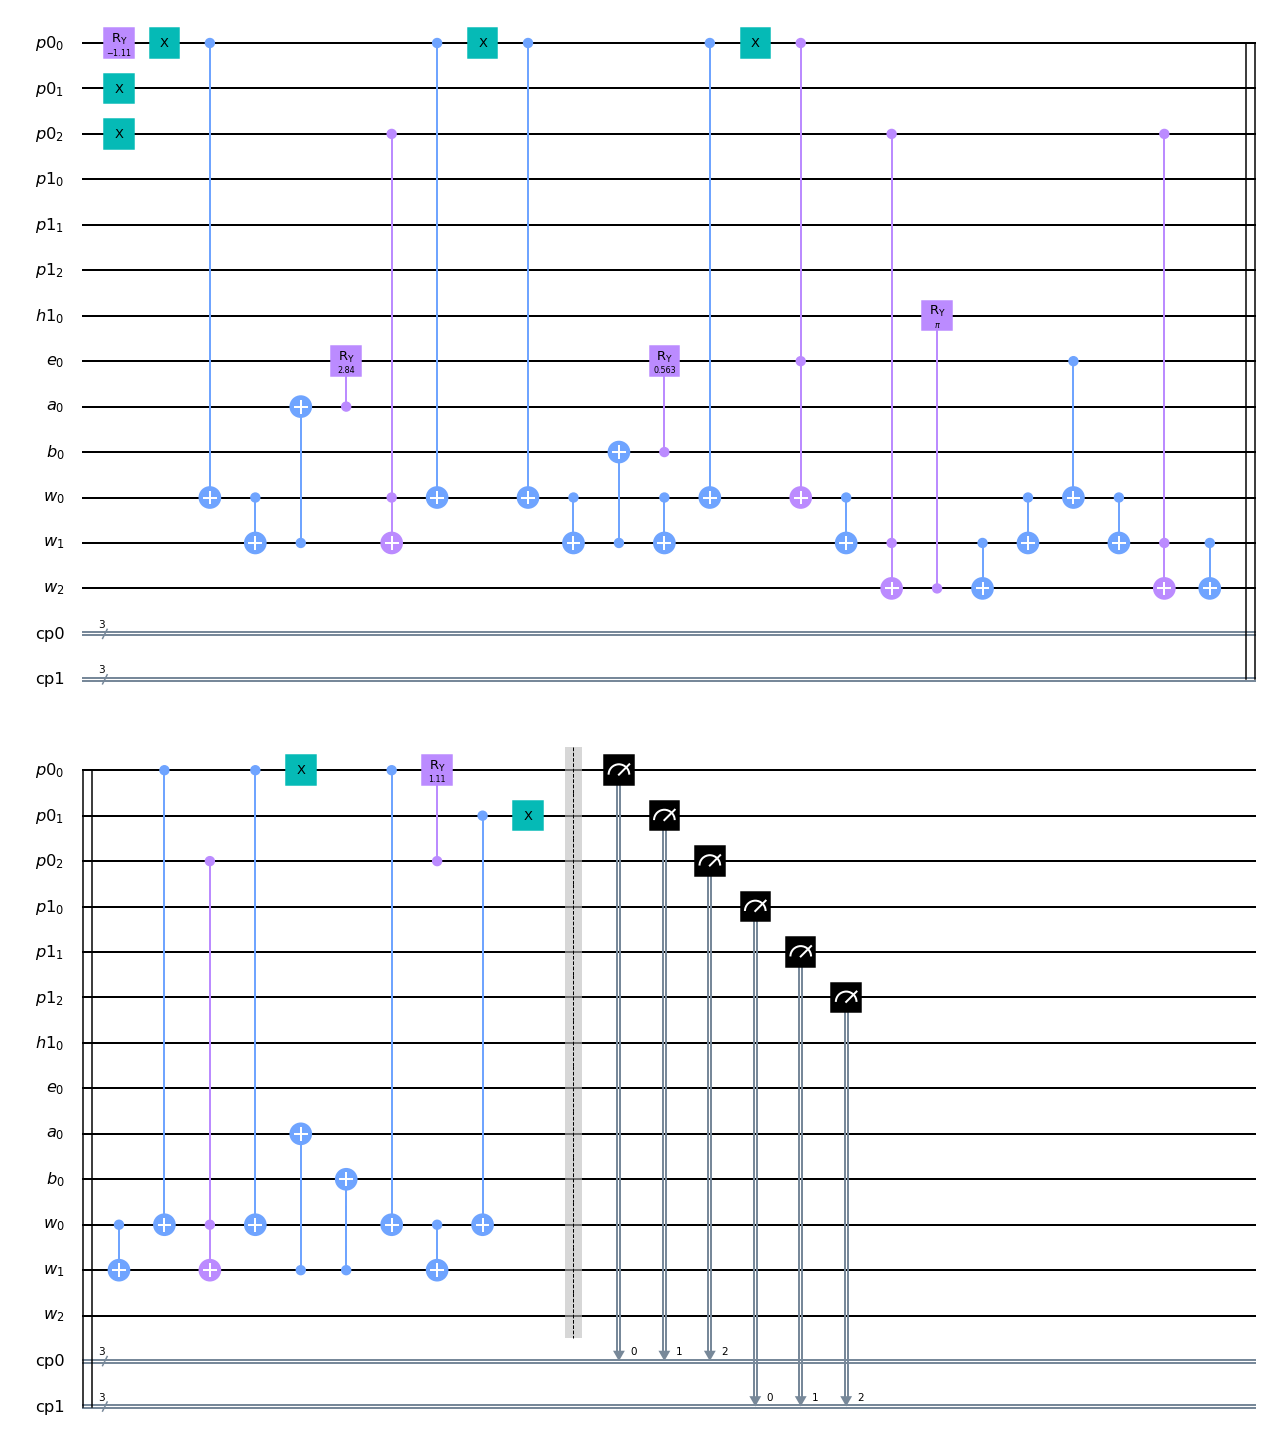

In [23]:
slimmed_by_qc3_2.draw(output='mpl')

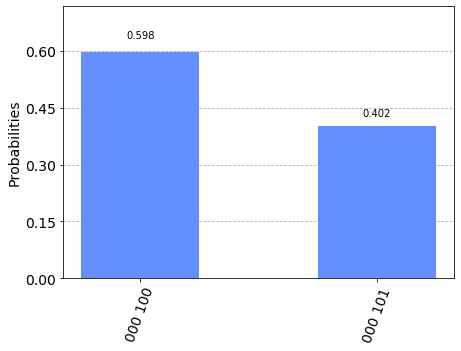

In [39]:
circuit=slimmed_by_qc3_2
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=2000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts,number_to_keep=None)

In [24]:
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [25]:
backend = provider.get_backend(qc)
example3_3 = slim.circuit_optimization( circuit = circuit_LBNL1 , slim_level = 1, cut = ['low',None], work_register = 'w')
slimmed_by_qc3_3, slimmed_dag3_3 = example3_3.slim_quantum(shots=8192 ,backend=backend)

               
  w_0: ────────
               
  w_1: ────────
               
  w_2: ────────
               
  w_3: ────────
               
 p0_0: ────────
               
 p0_1: ────────
       ┌───┐┌─┐
 p0_2: ┤ X ├┤M├
       └───┘└╥┘
 p1_0: ──────╫─
             ║ 
 p1_1: ──────╫─
             ║ 
 p1_2: ──────╫─
             ║ 
 h1_0: ──────╫─
             ║ 
  e_0: ──────╫─
             ║ 
phi_0: ──────╫─
             ║ 
  a_0: ──────╫─
             ║ 
  b_0: ──────╫─
             ║ 
 c1: 1/══════╩═
             0 
high: 4.742216854698199 mid: 3.5566626410236495 low: 2.3711084273490997
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'0': 268, '1': 7924}
Job Status: job has successfully run
Mitigated counts {'1': 8192.0}
                              
  w_0: ───────────────────────
                              
  w_1: ───────────────────────
                              
  w_2: ───────────────────────
                              
  w_3: ─────────────────

high: 2375.5421437040586 mid: 1484.7138398150366 low: 593.8855359260147
Cut-off line: 593.8855359260147
Job Status: job has successfully run
Raw counts: {'00': 592, '01': 960, '10': 2579, '11': 4061}
Job Status: job has successfully run
Mitigated counts {'00': 302.5537941303557, '10': 2540.6741139795513, '11': 5348.772091892852}
                           ┌───┐               ┌───┐        
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├────────
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘        
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼──────────
                             │  └───┘  │  └─┬─┘  │          
  w_2: ──────────────────────┼─────────┼────┼────┼──────────
                             │         │    │    │          
  w_3: ──────────────────────┼─────────┼────┼────┼──────────
       ┌─────────────┐┌───┐  │         │    │    │  ┌───┐┌─┐
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼────┼────■──┤ X ├┤M├
       └────┬───┬────┘└┬─┬┘            │    │       └───┘└╥

high: 3408.650244147001 mid: 2130.4064025918756 low: 852.1625610367503
Cut-off line: 852.1625610367503
Job Status: job has successfully run
Raw counts: {'00': 894, '01': 4415, '10': 509, '11': 2374}
Job Status: job has successfully run
Mitigated counts {'00': 723.442146463552, '01': 4574.079382541351, '10': 429.5861382843803, '11': 2464.8923327107163}
                           ┌───┐               ┌───┐     ┌───┐               
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├─────┤ X ├──■─────────■──
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘     └─┬─┘┌─┴─┐     ┌─┴─┐
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼─────────┼──┤ X ├──■──┤ X ├
                             │  └───┘  │  └─┬─┘  │         │  └───┘  │  └───┘
  w_2: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
                             │         │    │    │         │         │       
  w_3: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
       ┌─────────────┐

high: 4123.155281591216 mid: 3092.3664611934123 low: 2061.577640795608
Cut-off line: 2061.577640795608
Job Status: job has successfully run
Raw counts: {'0': 4886, '1': 3306}
Job Status: job has successfully run
Mitigated counts {'0': 4857.676238245685, '1': 3334.323761754315}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071)

high: 4889.009930810131 mid: 3055.6312067563317 low: 1222.2524827025327
Cut-off line: 1222.2524827025327
Job Status: job has successfully run
Raw counts: {'00': 1181, '01': 4436, '10': 534, '11': 2041}
Job Status: job has successfully run
Mitigated counts {'00': 880.7542831912901, '01': 4680.531595718646, '10': 387.1024726012691, '11': 2243.611648488795}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────────

high: 4980.19625588043 mid: 3735.1471919103224 low: 2490.098127940215
Cut-off line: 2490.098127940215
Job Status: job has successfully run
Raw counts: {'0': 4822, '1': 3370}
Job Status: job has successfully run
Mitigated counts {'0': 4723.284917752304, '1': 3468.7150822476965}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071)

high: 5989.825851917576 mid: 3743.641157448485 low: 1497.456462979394
Cut-off line: 1497.456462979394
Job Status: job has successfully run
Raw counts: {'00': 1032, '01': 3390, '10': 871, '11': 2899}
Job Status: job has successfully run
Mitigated counts {'00': 772.7428309177014, '01': 3605.9416675870825, '10': 661.1834881947926, '11': 3152.1320133004238}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────────

high: 6222.233477573115 mid: 3888.895923483197 low: 1555.5583693932788
Cut-off line: 1555.5583693932788
Job Status: job has successfully run
Raw counts: {'00': 2006, '01': 2178, '10': 2757, '11': 1251}
Job Status: job has successfully run
Mitigated counts {'00': 1839.705688920752, '01': 2315.4272278061785, '10': 2784.0204910988955, '11': 1252.846592174173}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────

high: 6093.375062770705 mid: 3808.3594142316906 low: 1523.3437656926762
Cut-off line: 1523.3437656926762
Job Status: job has successfully run
Raw counts: {'00': 2141, '01': 2460, '10': 1665, '11': 1926}
Job Status: job has successfully run
Mitigated counts {'00': 2083.104727624959, '01': 2519.812020535494, '10': 1608.636666565511, '11': 1980.4465852740361}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────

high: 6515.235395724478 mid: 4072.0221223277986 low: 1628.8088489311194
Cut-off line: 1628.8088489311194
Job Status: job has successfully run
Raw counts: {'00': 1812, '01': 2606, '10': 1758, '11': 2016}
Job Status: job has successfully run
Mitigated counts {'00': 1708.3226706126293, '01': 2694.082856992282, '10': 1703.9715382161053, '11': 2085.622934178983}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 7105.4552116050945 mid: 4440.909507253184 low: 1776.3638029012736
Cut-off line: 1776.3638029012736
Job Status: job has successfully run
Raw counts: {'00': 2625, '01': 2333, '10': 2204, '11': 1030}
Job Status: job has successfully run
Mitigated counts {'00': 2498.5672817095865, '01': 2312.620515103528, '10': 2338.3356885774892, '11': 1042.4765146093969}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────

high: 6842.994019759137 mid: 4276.87126234946 low: 1710.7485049397842
Cut-off line: 1710.7485049397842
Job Status: job has successfully run
Raw counts: {'00': 2134, '01': 2018, '10': 2113, '11': 1927}
Job Status: job has successfully run
Mitigated counts {'00': 2028.4883290111036, '01': 2090.8282995494947, '10': 2037.3796951028166, '11': 2035.3036763365858}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 7037.765810719802 mid: 4398.603631699876 low: 1759.4414526799505
Cut-off line: 1759.4414526799505
Job Status: job has successfully run
Raw counts: {'00': 2880, '01': 1441, '10': 2267, '11': 1604}
Job Status: job has successfully run
Mitigated counts {'00': 2822.6437011719368, '01': 1332.9140789453875, '10': 2363.733151748799, '11': 1672.7090681338764}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 7319.953167728472 mid: 4574.970729830295 low: 1829.988291932118
Cut-off line: 1829.988291932118
Job Status: job has successfully run
Raw counts: {'00': 1258, '01': 2354, '10': 1632, '11': 2948}
Job Status: job has successfully run
Mitigated counts {'00': 1146.4168527443508, '01': 2224.7567249573362, '10': 1676.560062053185, '11': 3144.2663602451285}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌──────────

high: 7276.322491963761 mid: 5457.241868972821 low: 3638.1612459818807
Cut-off line: 3638.1612459818807
Job Status: job has successfully run
Raw counts: {'0': 4606, '1': 3586}
Job Status: job has successfully run
Mitigated counts {'0': 4454.650947145726, '1': 3737.349052854275}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071

Job Status: job has successfully run
Mitigated counts {'00': 1285.2268098896739, '01': 1564.8966046559249, '10': 2196.7426659331604, '11': 3145.1339195212418}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼────────┼─────────■──┤ X ├──■───────»
       └────┬───┬────┘└───┘            │        │            

high: 7415.331504820574 mid: 4634.582190512859 low: 1853.8328762051435
Cut-off line: 1853.8328762051435
Job Status: job has successfully run
Raw counts: {'00': 1023, '01': 1276, '10': 2494, '11': 3399}
Job Status: job has successfully run
Mitigated counts {'00': 828.852890985037, '01': 1016.6230666961975, '10': 2631.264212285807, '11': 3715.259830032958}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────────

high: 7526.733239095761 mid: 5645.049929321821 low: 3763.3666195478804
Cut-off line: 3763.3666195478804
Job Status: job has successfully run
Raw counts: {'0': 4648, '1': 3544}
Job Status: job has successfully run
Mitigated counts {'0': 4482.174555828981, '1': 3709.8254441710183}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.107

high: 7625.430005047925 mid: 5719.072503785944 low: 3812.7150025239625
Cut-off line: 3812.7150025239625
Job Status: job has successfully run
Raw counts: {'0': 4419, '1': 3773}
Job Status: job has successfully run
Mitigated counts {'0': 4434.807730745892, '1': 3757.192269254109}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071

high: 7502.532848091333 mid: 5626.8996360685 low: 3751.2664240456666
Cut-off line: 3751.2664240456666
Job Status: job has successfully run
Raw counts: {'0': 7117, '1': 1075}
Job Status: job has successfully run
Mitigated counts {'0': 7094.779082178872, '1': 1097.2209178211276}


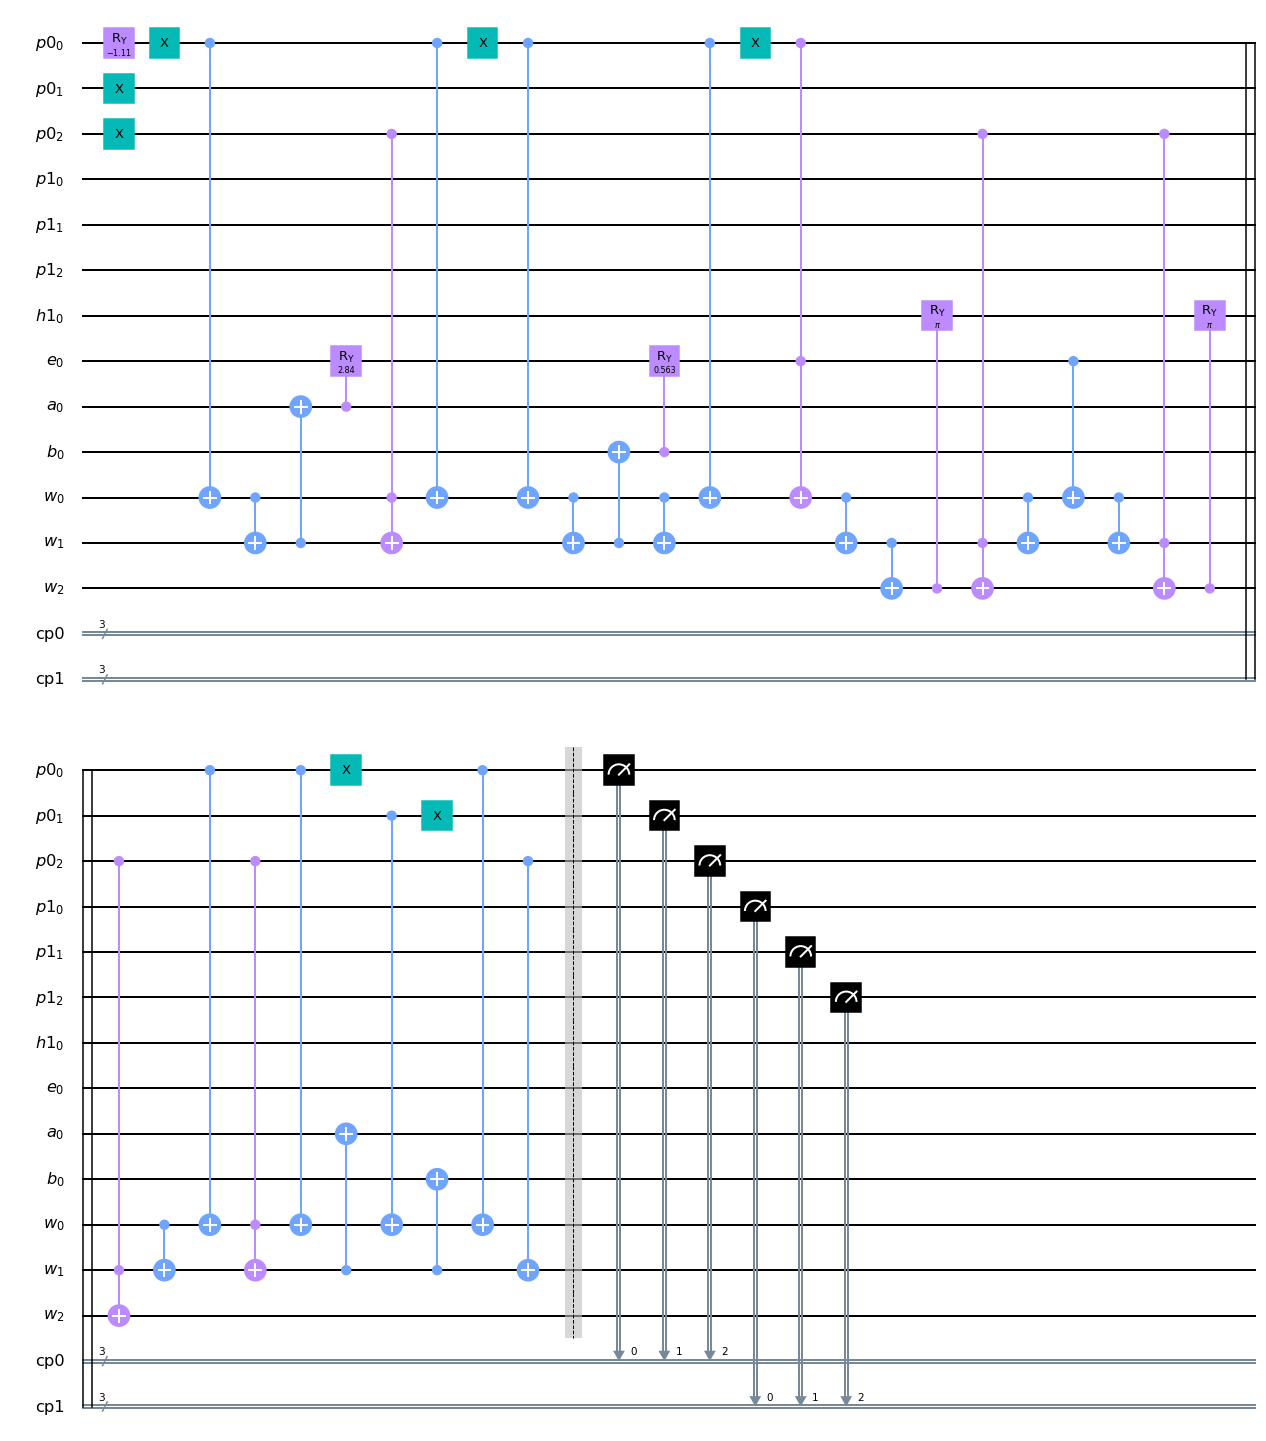

In [26]:
slimmed_by_qc3_3.draw(output='mpl')

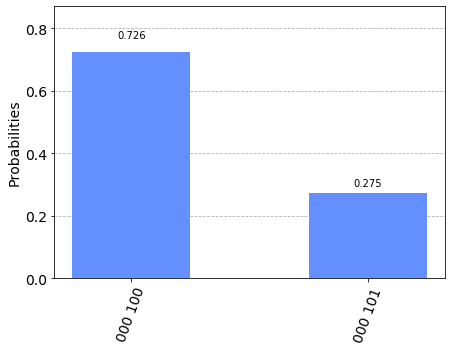

In [40]:
circuit=slimmed_by_qc3_3
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=2000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts,number_to_keep=None)

In [27]:
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [28]:
backend = provider.get_backend(qc)
example3_4 = slim.circuit_optimization( circuit = circuit_LBNL1 , slim_level = 1, cut = ['low',None], work_register = 'w')
slimmed_by_qc3_4, slimmed_dag3_4 = example3_4.slim_quantum(shots=8192 ,backend=backend)

               
  w_0: ────────
               
  w_1: ────────
               
  w_2: ────────
               
  w_3: ────────
               
 p0_0: ────────
               
 p0_1: ────────
       ┌───┐┌─┐
 p0_2: ┤ X ├┤M├
       └───┘└╥┘
 p1_0: ──────╫─
             ║ 
 p1_1: ──────╫─
             ║ 
 p1_2: ──────╫─
             ║ 
 h1_0: ──────╫─
             ║ 
  e_0: ──────╫─
             ║ 
phi_0: ──────╫─
             ║ 
  a_0: ──────╫─
             ║ 
  b_0: ──────╫─
             ║ 
 c1: 1/══════╩═
             0 
high: 4.742216854698199 mid: 3.5566626410236495 low: 2.3711084273490997
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'0': 286, '1': 7906}
Job Status: job has successfully run
Mitigated counts {'0': 2.6611106292376437e-10, '1': 8191.9999999997335}
                              
  w_0: ───────────────────────
                              
  w_1: ───────────────────────
                              
  w_2: ───────────────────────
              

high: 2492.3346009756306 mid: 1557.7091256097692 low: 623.0836502439076
Cut-off line: 623.0836502439076
Job Status: job has successfully run
Raw counts: {'00': 739, '01': 925, '10': 2694, '11': 3834}
Job Status: job has successfully run
Mitigated counts {'00': 561.5817353272572, '10': 2719.01450405889, '11': 4911.403760614284}
                           ┌───┐               ┌───┐        
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├────────
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘        
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼──────────
                             │  └───┘  │  └─┬─┘  │          
  w_2: ──────────────────────┼─────────┼────┼────┼──────────
                             │         │    │    │          
  w_3: ──────────────────────┼─────────┼────┼────┼──────────
       ┌─────────────┐┌───┐  │         │    │    │  ┌───┐┌─┐
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼────┼────■──┤ X ├┤M├
       └────┬───┬────┘└┬─┬┘            │    │       └───┘└╥┘


high: 3255.6842611964366 mid: 2034.802663247773 low: 813.9210652991092
Cut-off line: 813.9210652991092
Job Status: job has successfully run
Raw counts: {'00': 640, '01': 4490, '10': 392, '11': 2670}
Job Status: job has successfully run
Mitigated counts {'00': 593.2324062890109, '01': 4584.536583697439, '10': 340.7401990878032, '11': 2673.490810925747}
                           ┌───┐               ┌───┐     ┌───┐               
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├─────┤ X ├──■─────────■──
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘     └─┬─┘┌─┴─┐     ┌─┴─┐
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼─────────┼──┤ X ├──■──┤ X ├
                             │  └───┘  │  └─┬─┘  │         │  └───┘  │  └───┘
  w_2: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
                             │         │    │    │         │         │       
  w_3: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
       ┌─────────────┐

high: 4123.155281591216 mid: 3092.3664611934123 low: 2061.577640795608
Cut-off line: 2061.577640795608
Job Status: job has successfully run
Raw counts: {'0': 4758, '1': 3434}
Job Status: job has successfully run
Mitigated counts {'0': 4752.350718066074, '1': 3439.649281933926}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071)

high: 3824.752088027052 mid: 2390.4700550169077 low: 956.188022006763
Cut-off line: 956.188022006763
Job Status: job has successfully run
Raw counts: {'00': 565, '01': 2366, '10': 964, '11': 4297}
Job Status: job has successfully run
Mitigated counts {'00': 317.83963160541765, '01': 2481.561786249664, '10': 591.5372511452708, '11': 4801.061330999649}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌

high: 4960.66372359673 mid: 3720.4977926975475 low: 2480.331861798365
Cut-off line: 2480.331861798365
Job Status: job has successfully run
Raw counts: {'0': 4876, '1': 3316}
Job Status: job has successfully run
Mitigated counts {'0': 4825.1313323849545, '1': 3366.868667615047}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071)

high: 5818.45374139679 mid: 3636.533588372994 low: 1454.6134353491975
Cut-off line: 1454.6134353491975
Job Status: job has successfully run
Raw counts: {'00': 644, '01': 3337, '10': 685, '11': 3526}
Job Status: job has successfully run
Mitigated counts {'00': 170.5320502164806, '01': 3846.612439599828, '10': 176.41634371354743, '11': 3998.4391664701443}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────────

high: 6195.900146109229 mid: 3872.4375913182685 low: 1548.9750365273073
Cut-off line: 1548.9750365273073
Job Status: job has successfully run
Raw counts: {'00': 1684, '01': 1208, '10': 3501, '11': 1799}
Job Status: job has successfully run
Mitigated counts {'00': 1467.318754370499, '01': 1120.3710832166482, '10': 3688.0148847293476, '11': 1916.2952776835064}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────

high: 5960.304201383373 mid: 3725.190125864608 low: 1490.0760503458432
Cut-off line: 1490.0760503458432
Job Status: job has successfully run
Raw counts: {'00': 2116, '01': 1734, '10': 2439, '11': 1903}
Job Status: job has successfully run
Mitigated counts {'00': 2026.6661688474233, '01': 1785.675369861097, '10': 2394.7734691005617, '11': 1984.884992190918}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────

high: 6731.006176830775 mid: 4206.878860519235 low: 1682.7515442076938
Cut-off line: 1682.7515442076938
Job Status: job has successfully run
Raw counts: {'00': 1459, '01': 2068, '10': 1947, '11': 2718}
Job Status: job has successfully run
Mitigated counts {'00': 1282.0236912840085, '01': 1976.173751012134, '10': 1921.4044615594867, '11': 3012.3980961443713}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 7072.295192303016 mid: 4420.184495189385 low: 1768.073798075754
Cut-off line: 1768.073798075754
Job Status: job has successfully run
Raw counts: {'00': 3226, '01': 1612, '10': 2363, '11': 991}
Job Status: job has successfully run
Mitigated counts {'00': 3103.2949983816366, '01': 1591.7394323070996, '10': 2465.9232690539147, '11': 1031.0423002573502}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌──────────

high: 7058.862830122774 mid: 4411.789268826734 low: 1764.7157075306934
Cut-off line: 1764.7157075306934
Job Status: job has successfully run
Raw counts: {'00': 2236, '01': 2797, '10': 1461, '11': 1698}
Job Status: job has successfully run
Mitigated counts {'00': 2039.4820914146665, '01': 2989.105492388826, '10': 1352.6394678335623, '11': 1810.7729483629457}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 6924.6203800267995 mid: 4327.887737516749 low: 1731.1550950066999
Cut-off line: 1731.1550950066999
Job Status: job has successfully run
Raw counts: {'00': 2435, '01': 1556, '10': 2594, '11': 1607}
Job Status: job has successfully run
Mitigated counts {'00': 2283.358456614427, '01': 1649.385481204247, '10': 2510.81257137231, '11': 1748.4434908090166}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌──────────

high: 6961.998394066069 mid: 4351.248996291293 low: 1740.4995985165172
Cut-off line: 1740.4995985165172
Job Status: job has successfully run
Raw counts: {'00': 1985, '01': 806, '10': 3815, '11': 1586}
Job Status: job has successfully run
Mitigated counts {'00': 1761.5306671243802, '01': 737.1537040492296, '10': 4001.5960944302797, '11': 1691.7195343961107}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────

high: 7123.947029031373 mid: 4452.466893144609 low: 1780.9867572578432
Cut-off line: 1780.9867572578432
Job Status: job has successfully run
Raw counts: {'00': 2741, '01': 2274, '10': 1657, '11': 1520}
Job Status: job has successfully run
Mitigated counts {'00': 2610.6309559263113, '01': 2395.101785280926, '10': 1557.6974114371465, '11': 1628.569847355617}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────

high: 7088.189697380518 mid: 5316.142273035388 low: 3544.094848690259
Cut-off line: 3544.094848690259
Job Status: job has successfully run
Raw counts: {'0': 4078, '1': 4114}
Job Status: job has successfully run
Mitigated counts {'0': 4073.3224363436707, '1': 4118.67756365633}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) 

high: 7324.118964179324 mid: 4577.574352612078 low: 1831.029741044831
Cut-off line: 1831.029741044831
Job Status: job has successfully run
Raw counts: {'00': 1911, '01': 2704, '10': 1466, '11': 2111}
Job Status: job has successfully run
Mitigated counts {'00': 1811.2945145850542, '01': 2646.930501109469, '10': 1485.4817523144432, '11': 2248.293231991034}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────────

high: 7278.112054415142 mid: 4548.820034009464 low: 1819.5280136037854
Cut-off line: 1819.5280136037854
Job Status: job has successfully run
Raw counts: {'00': 1970, '01': 964, '10': 3581, '11': 1677}
Job Status: job has successfully run
Mitigated counts {'00': 1737.2957223831136, '01': 897.6423735727312, '10': 3719.0672341673094, '11': 1837.9946698768456}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────

high: 7186.070164638131 mid: 5389.552623478598 low: 3593.0350823190656
Cut-off line: 3593.0350823190656
Job Status: job has successfully run
Raw counts: {'0': 4080, '1': 4112}
Job Status: job has successfully run
Mitigated counts {'0': 3988.7200727880445, '1': 4203.279927211955}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.107

high: 7306.187317604632 mid: 5479.640488203474 low: 3653.093658802316
Cut-off line: 3653.093658802316
Job Status: job has successfully run
Raw counts: {'0': 4558, '1': 3634}
Job Status: job has successfully run
Mitigated counts {'0': 4347.871509112082, '1': 3844.128490887918}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) 

high: 7507.391911773802 mid: 5630.543933830351 low: 3753.695955886901
Cut-off line: 3753.695955886901
Job Status: job has successfully run
Raw counts: {'0': 7893, '1': 299}
Job Status: job has successfully run
Mitigated counts {'0': 7963.123734925665, '1': 228.8762650743347}


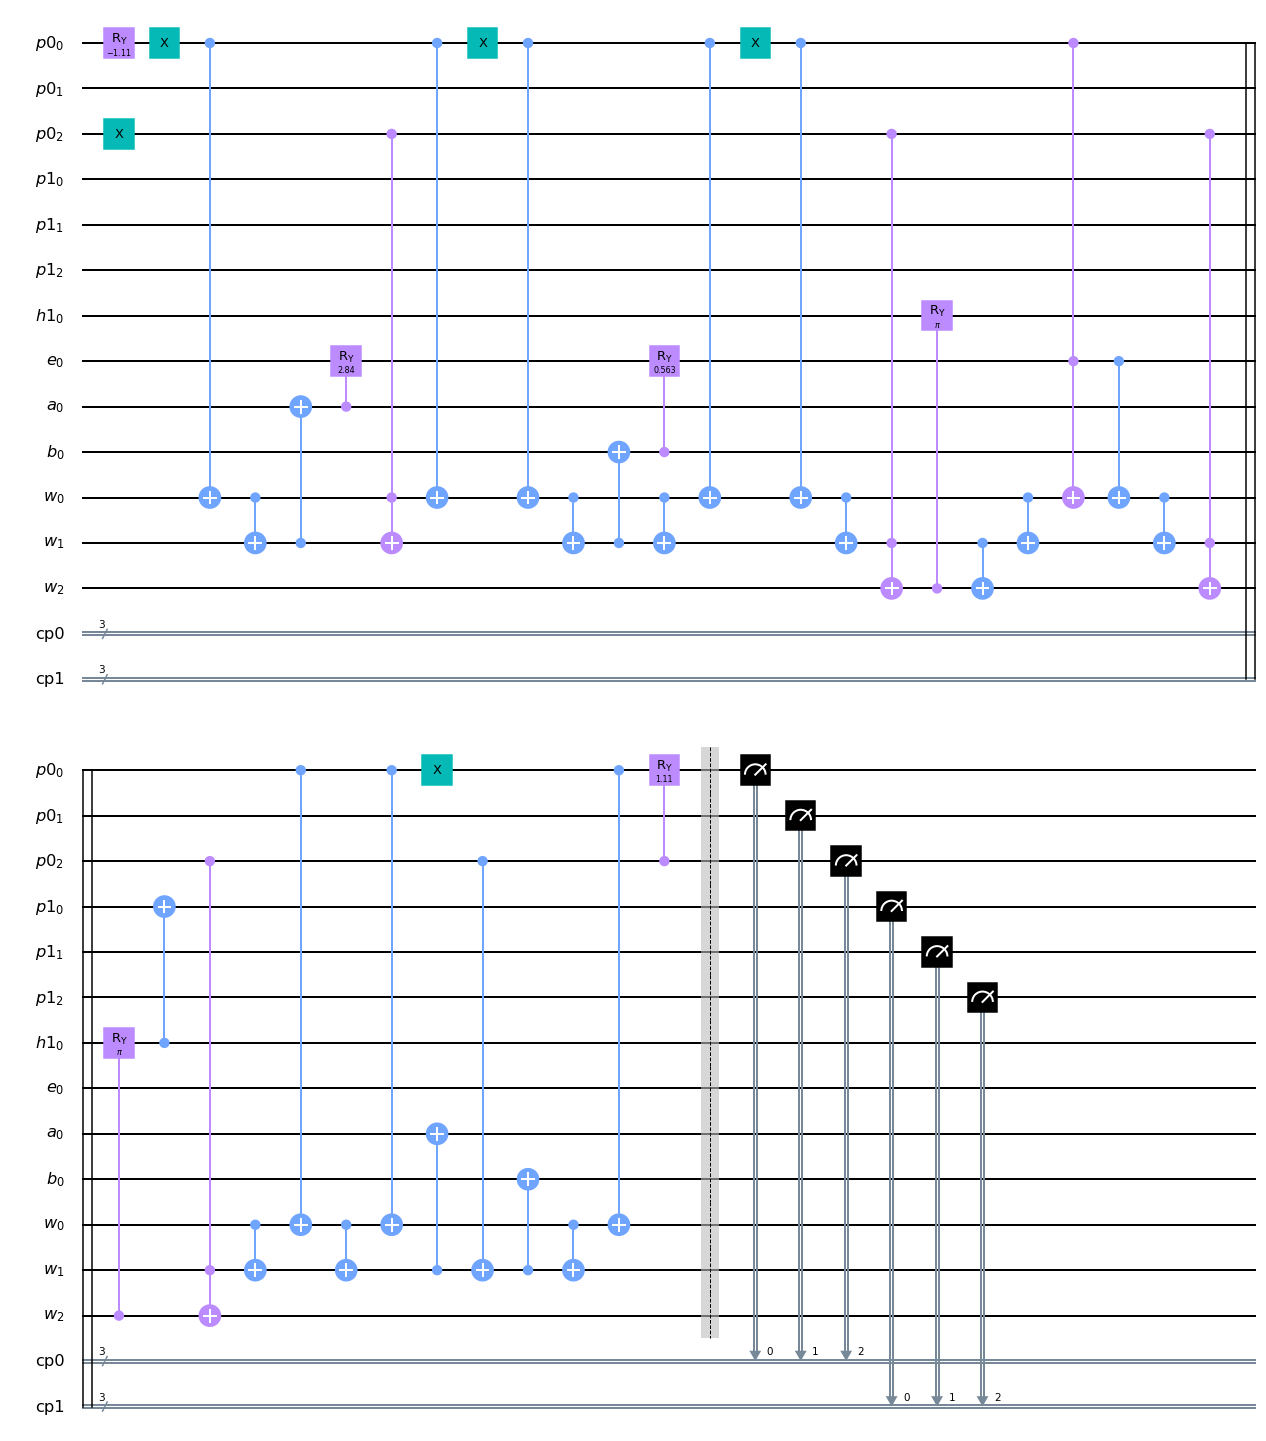

In [43]:
slimmed_by_qc3_4.draw(output='mpl')

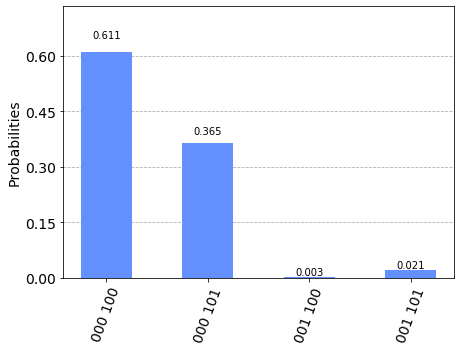

In [44]:
circuit=slimmed_by_qc3_4
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=2000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts,number_to_keep=None)

In [36]:
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [37]:
backend = provider.get_backend(qc)
example3_5 = slim.circuit_optimization( circuit = circuit_LBNL1 , slim_level = 1, cut = ['low',None], work_register = 'w')
slimmed_by_qc3_5, slimmed_dag3_5 = example3_5.slim_quantum(shots=8192 ,backend=backend)

               
  w_0: ────────
               
  w_1: ────────
               
  w_2: ────────
               
  w_3: ────────
               
 p0_0: ────────
               
 p0_1: ────────
       ┌───┐┌─┐
 p0_2: ┤ X ├┤M├
       └───┘└╥┘
 p1_0: ──────╫─
             ║ 
 p1_1: ──────╫─
             ║ 
 p1_2: ──────╫─
             ║ 
 h1_0: ──────╫─
             ║ 
  e_0: ──────╫─
             ║ 
phi_0: ──────╫─
             ║ 
  a_0: ──────╫─
             ║ 
  b_0: ──────╫─
             ║ 
 c1: 1/══════╩═
             0 
high: 4.803038381203805 mid: 3.602278785902854 low: 2.4015191906019027
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'0': 268, '1': 7924}
Job Status: job has successfully run
Mitigated counts {'1': 8192.0}
                              
  w_0: ───────────────────────
                              
  w_1: ───────────────────────
                              
  w_2: ───────────────────────
                              
  w_3: ──────────────────

high: 2513.5256950955545 mid: 1570.9535594347217 low: 628.3814237738886
Cut-off line: 628.3814237738886
Job Status: job has successfully run
Raw counts: {'00': 659, '01': 868, '10': 2803, '11': 3862}
Job Status: job has successfully run
Mitigated counts {'00': 386.93007963546023, '10': 2716.755009380081, '11': 5088.3149110050545}
                           ┌───┐               ┌───┐        
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├────────
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘        
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼──────────
                             │  └───┘  │  └─┬─┘  │          
  w_2: ──────────────────────┼─────────┼────┼────┼──────────
                             │         │    │    │          
  w_3: ──────────────────────┼─────────┼────┼────┼──────────
       ┌─────────────┐┌───┐  │         │    │    │  ┌───┐┌─┐
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼────┼────■──┤ X ├┤M├
       └────┬───┬────┘└┬─┬┘            │    │       └───┘└

high: 3716.8878793105323 mid: 2323.0549245690827 low: 929.2219698276331
Cut-off line: 929.2219698276331
Job Status: job has successfully run
Raw counts: {'00': 1014, '01': 4257, '10': 795, '11': 2126}
Job Status: job has successfully run
Mitigated counts {'00': 744.2000789657674, '01': 4507.522305950079, '10': 681.548035763665, '11': 2258.7295793204894}
                           ┌───┐               ┌───┐     ┌───┐               
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├─────┤ X ├──■─────────■──
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘     └─┬─┘┌─┴─┐     ┌─┴─┐
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼─────────┼──┤ X ├──■──┤ X ├
                             │  └───┘  │  └─┬─┘  │         │  └───┘  │  └───┘
  w_2: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
                             │         │    │    │         │         │       
  w_3: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
       ┌────────────

high: 4223.983539038398 mid: 3167.9876542787983 low: 2111.991769519199
Cut-off line: 2111.991769519199
Job Status: job has successfully run
Raw counts: {'0': 4897, '1': 3295}
Job Status: job has successfully run
Mitigated counts {'0': 4850.676459417737, '1': 3341.3235405822634}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071

high: 5037.446836575827 mid: 3148.4042728598915 low: 1259.3617091439567
Cut-off line: 1259.3617091439567
Job Status: job has successfully run
Raw counts: {'00': 958, '01': 3512, '10': 789, '11': 2933}
Job Status: job has successfully run
Mitigated counts {'00': 656.7919257616853, '01': 3815.465702058652, '10': 525.8696625767784, '11': 3193.8727096028847}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────────

high: 5603.872421195554 mid: 4202.904315896665 low: 2801.936210597777
Cut-off line: 2801.936210597777
Job Status: job has successfully run
Raw counts: {'0': 4632, '1': 3560}
Job Status: job has successfully run
Mitigated counts {'0': 4574.576489875857, '1': 3617.4235101241425}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071)

high: 5907.401490404216 mid: 3692.125931502635 low: 1476.850372601054
Cut-off line: 1476.850372601054
Job Status: job has successfully run
Raw counts: {'00': 934, '01': 3032, '10': 955, '11': 3271}
Job Status: job has successfully run
Mitigated counts {'00': 739.0924830074866, '01': 3175.4667367437205, '10': 763.6414442552724, '11': 3513.7993359935203}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────

high: 6553.483022872926 mid: 4095.926889295579 low: 1638.3707557182315
Cut-off line: 1638.3707557182315
Job Status: job has successfully run
Raw counts: {'00': 1595, '01': 2517, '10': 3116, '11': 964}
Job Status: job has successfully run
Mitigated counts {'00': 1514.994355344967, '01': 2569.3984180178136, '10': 3162.0163800868863, '11': 945.5908465503333}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌──────────

high: 6251.026581316027 mid: 3906.8916133225166 low: 1562.7566453290067
Cut-off line: 1562.7566453290067
Job Status: job has successfully run
Raw counts: {'00': 1764, '01': 3141, '10': 1435, '11': 1852}
Job Status: job has successfully run
Mitigated counts {'00': 1604.950326105928, '01': 3280.9423067133985, '10': 1344.294673044377, '11': 1961.8126941362966}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 6307.560182499983 mid: 3942.2251140624894 low: 1576.8900456249958
Cut-off line: 1576.8900456249958
Job Status: job has successfully run
Raw counts: {'00': 2748, '01': 2157, '10': 1789, '11': 1498}
Job Status: job has successfully run
Mitigated counts {'00': 2696.997962627285, '01': 2262.2917495271113, '10': 1688.036895836766, '11': 1544.6733920088373}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 6437.790237372771 mid: 4023.618898357982 low: 1609.4475593431928
Cut-off line: 1609.4475593431928
Job Status: job has successfully run
Raw counts: {'00': 2051, '01': 2066, '10': 2356, '11': 1719}
Job Status: job has successfully run
Mitigated counts {'00': 1907.1584609305467, '01': 2012.43511402454, '10': 2474.239410406362, '11': 1798.1670146385504}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌──────────

high: 6822.031564973665 mid: 4263.76972810854 low: 1705.5078912434162
Cut-off line: 1705.5078912434162
Job Status: job has successfully run
Raw counts: {'00': 1978, '01': 1958, '10': 2164, '11': 2092}
Job Status: job has successfully run
Mitigated counts {'00': 1873.5941158656267, '01': 2014.9422492248455, '10': 2124.5190638962063, '11': 2178.9445710133223}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 6844.5392165749645 mid: 4277.8370103593525 low: 1711.1348041437411
Cut-off line: 1711.1348041437411
Job Status: job has successfully run
Raw counts: {'00': 2125, '01': 2028, '10': 2103, '11': 1936}
Job Status: job has successfully run
Mitigated counts {'00': 2026.3962805880417, '01': 2100.720772711153, '10': 2014.755119375947, '11': 2050.127827324857}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 7270.621676046526 mid: 4544.138547529079 low: 1817.6554190116315
Cut-off line: 1817.6554190116315
Job Status: job has successfully run
Raw counts: {'00': 1192, '01': 1613, '10': 2381, '11': 3006}
Job Status: job has successfully run
Mitigated counts {'00': 962.5084898059187, '01': 1517.3112846262895, '10': 2360.1151849467415, '11': 3352.0650406210507}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 7270.740306138723 mid: 5453.055229604042 low: 3635.3701530693615
Cut-off line: 3635.3701530693615
Job Status: job has successfully run
Raw counts: {'0': 4536, '1': 3656}
Job Status: job has successfully run
Mitigated counts {'0': 4400.652615831077, '1': 3791.347384168924}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071

high: 7339.138538894288 mid: 4586.96158680893 low: 1834.784634723572
Cut-off line: 1834.784634723572
Job Status: job has successfully run
Raw counts: {'00': 1930, '01': 2667, '10': 1412, '11': 2183}
Job Status: job has successfully run
Mitigated counts {'00': 1819.6298545762324, '01': 2549.6780947926386, '10': 1448.071004997892, '11': 2374.6210456332374}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────────

high: 7280.663691734087 mid: 4550.414807333804 low: 1820.1659229335216
Cut-off line: 1820.1659229335216
Job Status: job has successfully run
Raw counts: {'00': 1981, '01': 1808, '10': 2309, '11': 2094}
Job Status: job has successfully run
Mitigated counts {'00': 1731.5940969170153, '01': 1775.7947132577208, '10': 2340.214423008143, '11': 2344.3967668171204}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 7413.848634443062 mid: 5560.386475832296 low: 3706.924317221531
Cut-off line: 3706.924317221531
Job Status: job has successfully run
Raw counts: {'0': 4269, '1': 3923}
Job Status: job has successfully run
Mitigated counts {'0': 4109.269269736514, '1': 4082.730730263486}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) 

high: 7441.645776264256 mid: 5581.234332198192 low: 3720.822888132128
Cut-off line: 3720.822888132128
Job Status: job has successfully run
Raw counts: {'0': 3714, '1': 4478}
Job Status: job has successfully run
Mitigated counts {'0': 3674.4518068640423, '1': 4517.548193135957}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071)

high: 7545.145901289698 mid: 5658.859425967274 low: 3772.572950644849
Cut-off line: 3772.572950644849
Job Status: job has successfully run
Raw counts: {'0': 7938, '1': 254}
Job Status: job has successfully run
Mitigated counts {'0': 7980.685375768322, '1': 211.3146242316783}


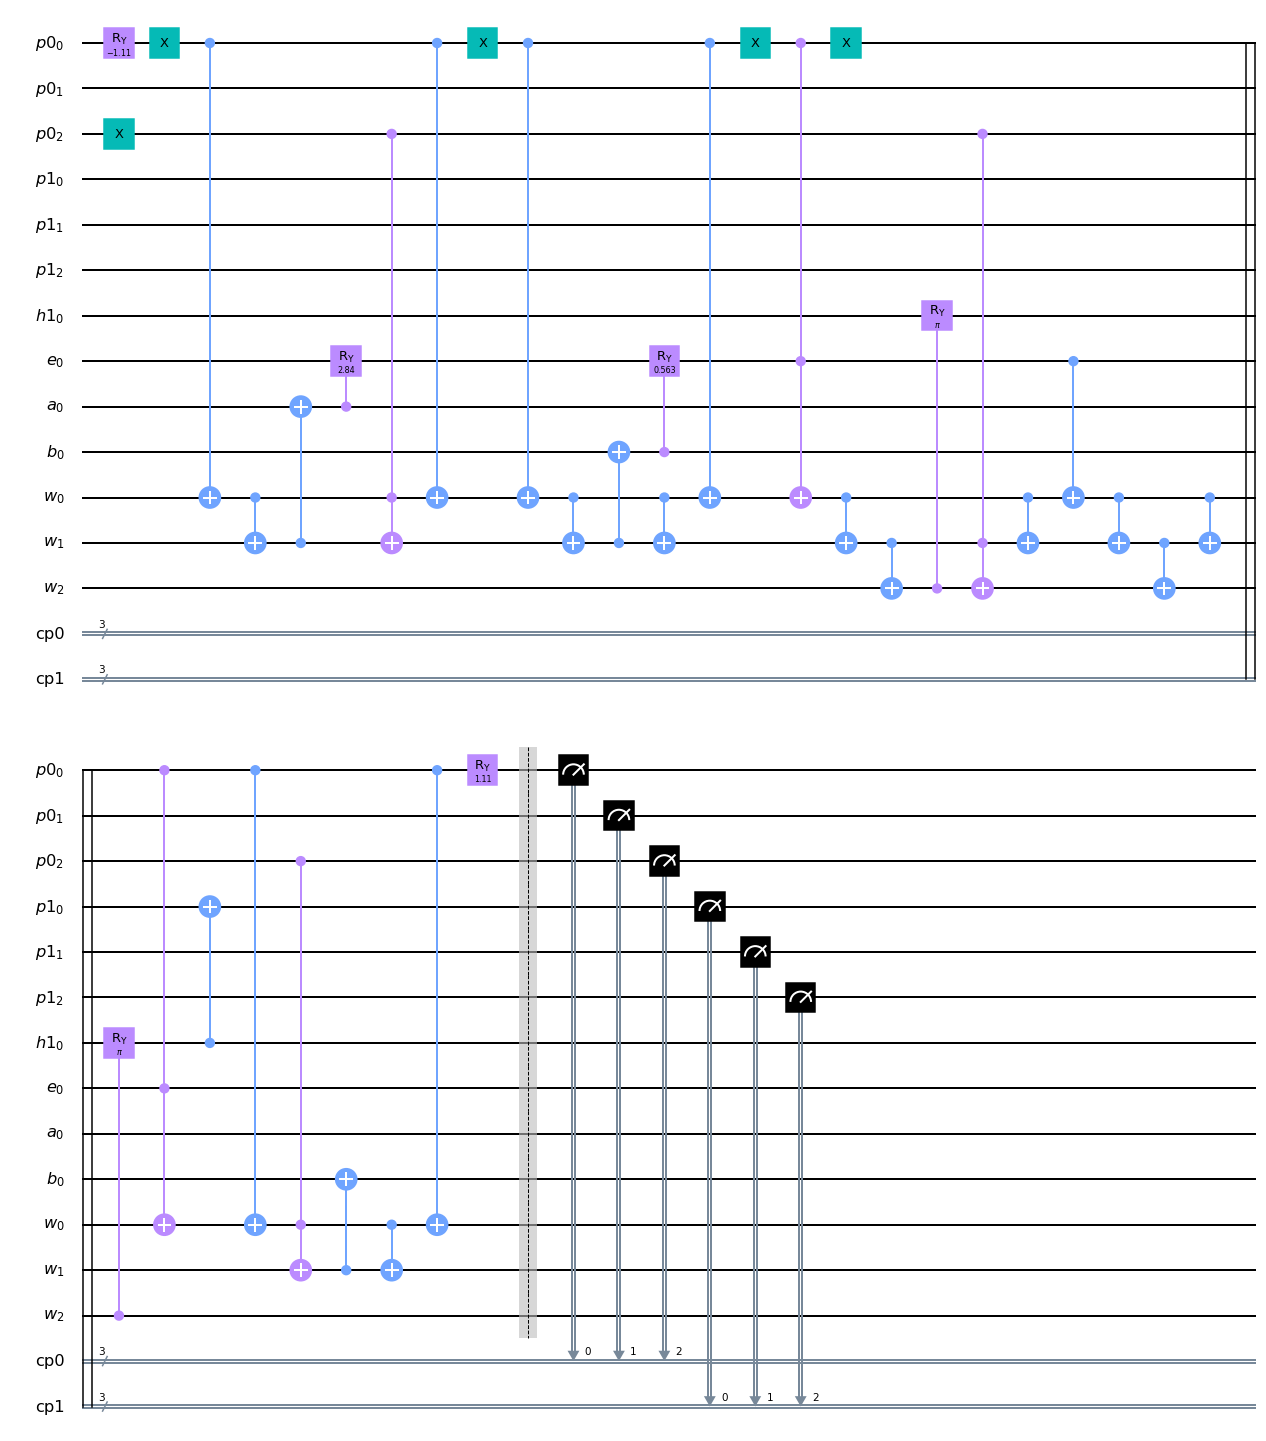

In [38]:
slimmed_by_qc3_5.draw(output='mpl')

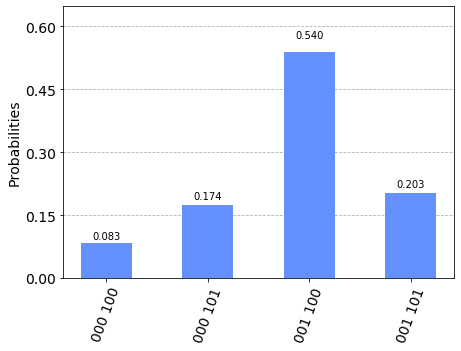

In [45]:
circuit=slimmed_by_qc3_5
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=2000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts,number_to_keep=None)

In [46]:
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [47]:
backend = provider.get_backend(qc)
example4 = slim.circuit_optimization( circuit = circuit_LBNL1 , slim_level = 1, cut = ['high',0.25], work_register = 'w')
slimmed_by_qc4, slimmed_dag4 = example4.slim_quantum(shots=8192 ,backend=backend)

               
  w_0: ────────
               
  w_1: ────────
               
  w_2: ────────
               
  w_3: ────────
               
 p0_0: ────────
               
 p0_1: ────────
       ┌───┐┌─┐
 p0_2: ┤ X ├┤M├
       └───┘└╥┘
 p1_0: ──────╫─
             ║ 
 p1_1: ──────╫─
             ║ 
 p1_2: ──────╫─
             ║ 
 h1_0: ──────╫─
             ║ 
  e_0: ──────╫─
             ║ 
phi_0: ──────╫─
             ║ 
  a_0: ──────╫─
             ║ 
  b_0: ──────╫─
             ║ 
 c1: 1/══════╩═
             0 
high: 4.803038381203805 mid: 3.602278785902854 low: 2.4015191906019027
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'0': 311, '1': 7881}
Job Status: job has successfully run
Mitigated counts {'1': 8192.0}
                              
  w_0: ───────────────────────
                              
  w_1: ───────────────────────
                              
  w_2: ───────────────────────
                              
  w_3: ──────────────────

high: 2444.4157050587237 mid: 1527.7598156617023 low: 611.1039262646809
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 676, '01': 877, '10': 3078, '11': 3561}
Job Status: job has successfully run
Mitigated counts {'00': 117.68218757059883, '10': 3237.1104265436834, '11': 4837.207385887979}
                           ┌───┐               ┌───┐        
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├────────
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘        
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼──────────
                             │  └───┘  │  └─┬─┘  │          
  w_2: ──────────────────────┼─────────┼────┼────┼──────────
                             │         │    │    │          
  w_3: ──────────────────────┼─────────┼────┼────┼──────────
       ┌─────────────┐┌───┐  │         │    │    │  ┌───┐┌─┐
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼────┼────■──┤ X ├┤M├
       └────┬───┬────┘└┬─┬┘            │    │       └───┘└╥┘
 p0_1: ─

high: 3706.150001682723 mid: 2316.343751051702 low: 926.5375004206808
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 1235, '01': 3951, '10': 686, '11': 2320}
Job Status: job has successfully run
Mitigated counts {'00': 1108.9011102941017, '01': 4071.4888252570995, '10': 609.5593017610429, '11': 2402.050762687756}
                           ┌───┐               ┌───┐     ┌───┐               
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├─────┤ X ├──■─────────■──
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘     └─┬─┘┌─┴─┐     ┌─┴─┐
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼─────────┼──┤ X ├──■──┤ X ├
                             │  └───┘  │  └─┬─┘  │         │  └───┘  │  └───┘
  w_2: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
                             │         │    │    │         │         │       
  w_3: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
       ┌─────────────┐┌───┐  │ 

high: 4108.219039494827 mid: 3081.16427962112 low: 2054.1095197474133
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 5039, '1': 3153}
Job Status: job has successfully run
Mitigated counts {'0': 4999.382402054445, '1': 3192.617597945555}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■──

high: 4279.963845454837 mid: 2674.977403409273 low: 1069.9909613637092
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 540, '01': 2539, '10': 871, '11': 4242}
Job Status: job has successfully run
Mitigated counts {'00': 330.2641363756341, '01': 2632.265571886278, '10': 513.742784743074, '11': 4715.727506995014}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │    

high: 4443.32311154691 mid: 3332.4923336601823 low: 2221.661555773455
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 3627, '1': 4565}
Job Status: job has successfully run
Mitigated counts {'0': 3441.0900512960757, '1': 4750.909948703924}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─

high: 4774.095830048116 mid: 2983.8098937800723 low: 1193.523957512029
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 770, '01': 3050, '10': 912, '11': 3460}
Job Status: job has successfully run
Mitigated counts {'00': 465.13970400128756, '01': 3324.6445646919, '10': 563.313805316137, '11': 3838.9019259906754}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │    

high: 5612.479209040261 mid: 3507.799505650163 low: 1403.1198022600652
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 2043, '01': 2742, '10': 2097, '11': 1310}
Job Status: job has successfully run
Mitigated counts {'00': 1791.2292234628985, '01': 2694.567754162222, '10': 2270.1998806421034, '11': 1436.0031417327762}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐ 

high: 5616.62103733452 mid: 3510.388148334075 low: 1404.15525933363
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 713, '01': 4085, '10': 563, '11': 2831}
Job Status: job has successfully run
Mitigated counts {'00': 668.1215076124283, '01': 4151.6707180217045, '10': 516.8985107520243, '11': 2855.3092636138426}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │    

high: 5935.082909331832 mid: 3709.4268183323948 low: 1483.770727332958
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 1337, '01': 3769, '10': 953, '11': 2133}
Job Status: job has successfully run
Mitigated counts {'00': 1178.2589452544364, '01': 3646.7083638208996, '10': 1015.1617246511033, '11': 2351.870966273561}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  

high: 5924.353295025055 mid: 3702.7208093906593 low: 1481.0883237562637
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 2201, '01': 2763, '10': 2244, '11': 984}
Job Status: job has successfully run
Mitigated counts {'00': 2118.7609852107175, '01': 2826.0872283172253, '10': 2255.8429552455627, '11': 991.3088312264949}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐ 

high: 5842.309355144285 mid: 3651.4433469651785 low: 1460.5773387860713
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 1441, '01': 2907, '10': 1358, '11': 2486}
Job Status: job has successfully run
Mitigated counts {'00': 1406.4511115679031, '01': 2920.3322374778018, '10': 1334.2296782561914, '11': 2530.986972698104}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐

high: 6267.914535932805 mid: 3917.446584958003 low: 1566.9786339832012
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 2903, '01': 1880, '10': 2017, '11': 1392}
Job Status: job has successfully run
Mitigated counts {'00': 2740.0393872165737, '01': 1695.911372874339, '10': 2249.1458722714574, '11': 1506.9033676376303}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐ 

high: 6189.668601447083 mid: 3868.542875904427 low: 1547.4171503617708
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 1122, '01': 726, '10': 3717, '11': 2627}
Job Status: job has successfully run
Mitigated counts {'00': 784.7262176714038, '01': 488.09042401505684, '10': 4075.4636821156023, '11': 2843.719676197938}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │

high: 6280.575170295723 mid: 4710.431377721792 low: 3140.2875851478616
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 3139, '1': 5053}
Job Status: job has successfully run
Mitigated counts {'0': 3092.6036217308433, '1': 5099.396378269157}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■

high: 6418.23472406443 mid: 4011.396702540269 low: 1604.5586810161076
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 1999, '01': 2222, '10': 1954, '11': 2017}
Job Status: job has successfully run
Mitigated counts {'00': 1781.3247749646011, '01': 2410.0606620688404, '10': 1791.9311576646544, '11': 2208.683405301905}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  

high: 6391.498434335699 mid: 3994.686521459812 low: 1597.8746085839248
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 1511, '01': 1143, '10': 3105, '11': 2433}
Job Status: job has successfully run
Mitigated counts {'00': 1231.0290000950472, '01': 920.1251601270874, '10': 3365.6750683889913, '11': 2675.1707713888736}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐ 

high: 6689.142231667297 mid: 5016.8566737504725 low: 3344.5711158336485
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 4387, '1': 3805}
Job Status: job has successfully run
Mitigated counts {'0': 4726.849379621601, '1': 3465.150620378399}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■

high: 6939.047386984435 mid: 5204.285540238327 low: 3469.5236934922177
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 2703, '1': 5489}
Job Status: job has successfully run
Mitigated counts {'0': 2646.391024556924, '1': 5545.608975443076}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─

high: 7023.067134665629 mid: 5267.300350999221 low: 3511.5335673328145
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 7069, '1': 1123}
Job Status: job has successfully run
Mitigated counts {'0': 7197.326646430579, '1': 994.6733535694209}


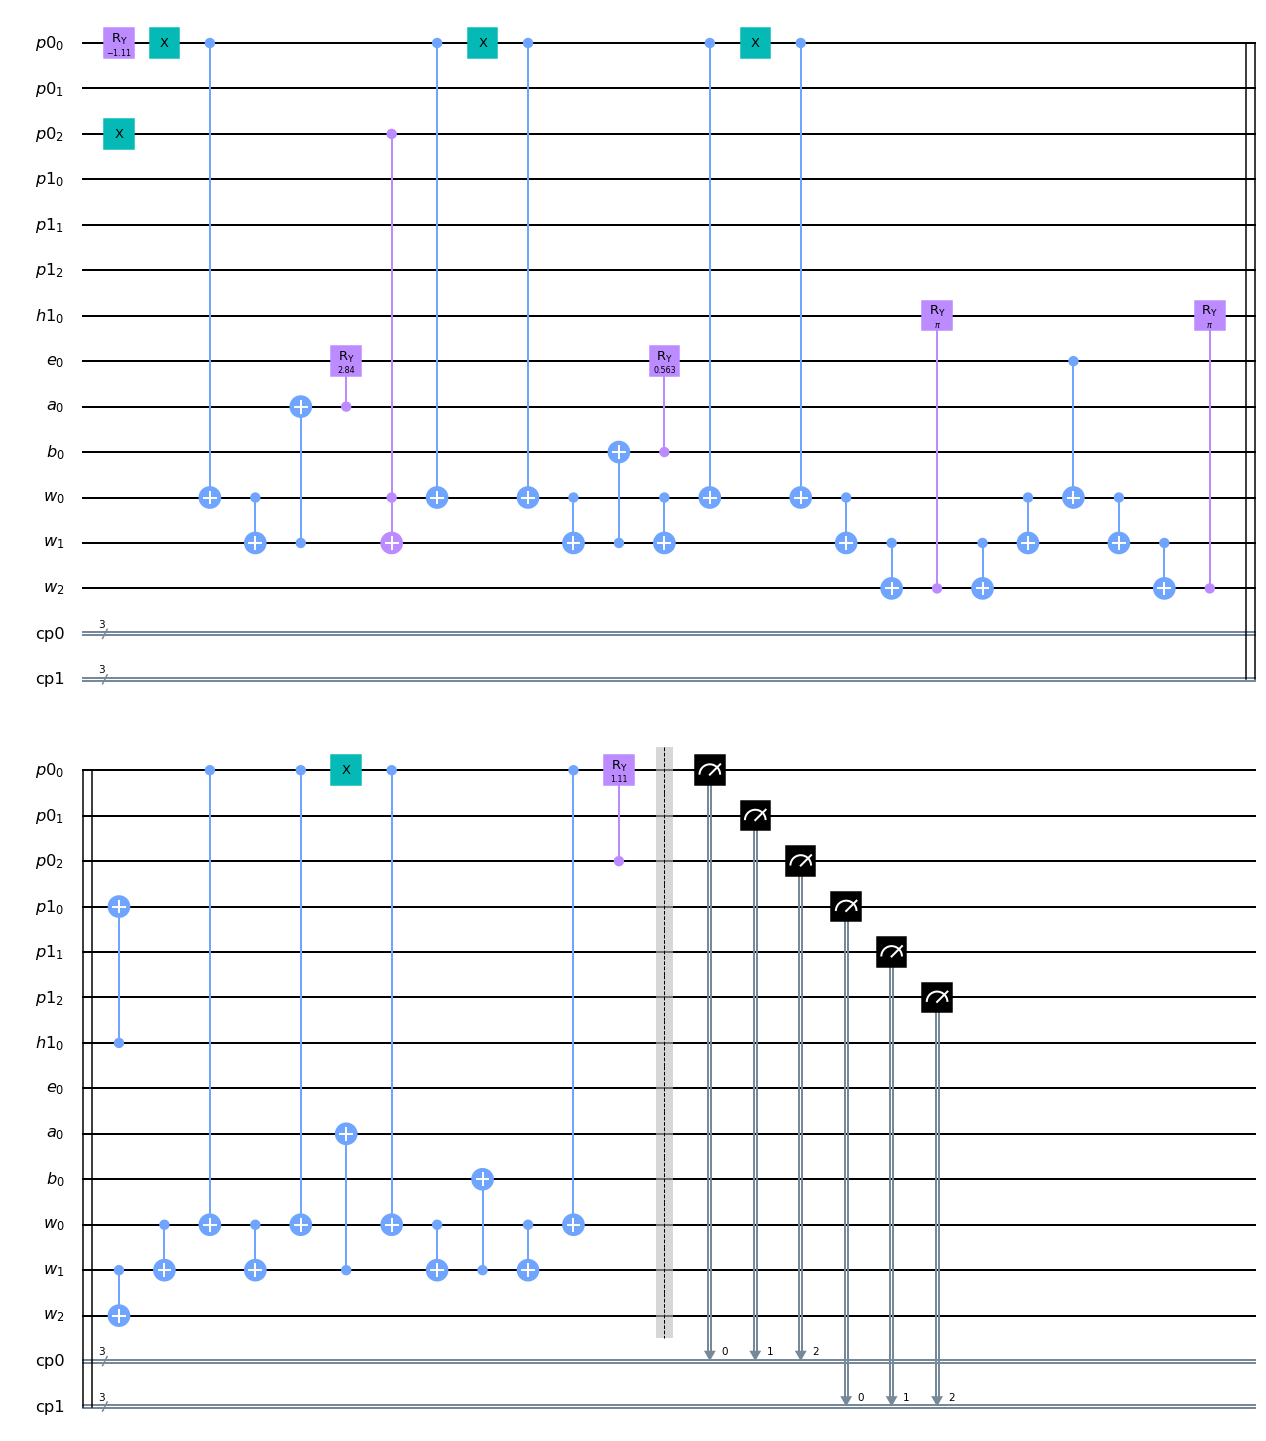

In [48]:
slimmed_by_qc4.draw(output='mpl')

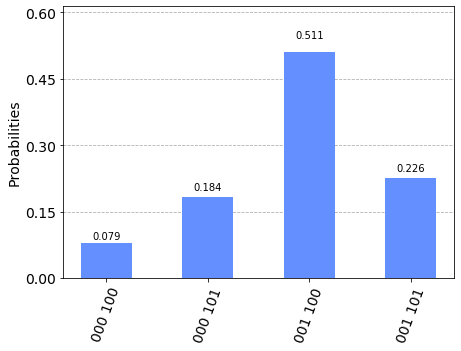

In [49]:
circuit=slimmed_by_qc4
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=2000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts,number_to_keep=None)

In [50]:
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [51]:
backend = provider.get_backend(qc)
example5 = slim.circuit_optimization( circuit = circuit_LBNL1 , slim_level = 1, cut = ['mid',0.25], work_register = 'w')
slimmed_by_qc5, slimmed_dag5 = example5.slim_quantum(shots=8192 ,backend=backend)

               
  w_0: ────────
               
  w_1: ────────
               
  w_2: ────────
               
  w_3: ────────
               
 p0_0: ────────
               
 p0_1: ────────
       ┌───┐┌─┐
 p0_2: ┤ X ├┤M├
       └───┘└╥┘
 p1_0: ──────╫─
             ║ 
 p1_1: ──────╫─
             ║ 
 p1_2: ──────╫─
             ║ 
 h1_0: ──────╫─
             ║ 
  e_0: ──────╫─
             ║ 
phi_0: ──────╫─
             ║ 
  a_0: ──────╫─
             ║ 
  b_0: ──────╫─
             ║ 
 c1: 1/══════╩═
             0 
high: 4.803038381203805 mid: 3.602278785902854 low: 2.4015191906019027
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'0': 285, '1': 7907}
Job Status: job has successfully run
Mitigated counts {'1': 8192.0}
                              
  w_0: ───────────────────────
                              
  w_1: ───────────────────────
                              
  w_2: ───────────────────────
                              
  w_3: ──────────────────

high: 429.11950796665315 mid: 268.1996924791582 low: 107.27987699166329
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'00': 151, '01': 331, '10': 2635, '11': 5075}
Job Status: job has successfully run
Mitigated counts {'10': 2618.018363514243, '11': 5573.981636489398}
                           ┌───┐               ┌───┐        
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├────────
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘        
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼──────────
                             │  └───┘  │  └───┘  │          
  w_2: ──────────────────────┼─────────┼─────────┼──────────
                             │         │         │          
  w_3: ──────────────────────┼─────────┼─────────┼──────────
       ┌─────────────┐┌───┐  │         │         │  ┌───┐┌─┐
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼─────────■──┤ X ├┤M├
       └────┬───┬────┘└┬─┬┘            │            └───┘└╥┘
 p0_1: ─────┤ X ├──────┤M├──────────

high: 3331.724527522397 mid: 2082.327829701498 low: 832.9311318805992
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 611, '01': 4412, '10': 530, '11': 2639}
Job Status: job has successfully run
Mitigated counts {'00': 438.234194915753, '01': 4545.022383658099, '10': 441.40317331701505, '11': 2767.340248109134}
                           ┌───┐               ┌───┐     ┌───┐             »
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├─────┤ X ├──■──────────»
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘     └─┬─┘┌─┴─┐        »
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼─────────┼──┤ X ├─────■──»
                             │  └───┘  │  └───┘  │         │  └─┬─┘     │  »
  w_2: ──────────────────────┼─────────┼─────────┼─────────┼────┼───────┼──»
                             │         │         │         │    │       │  »
  w_3: ──────────────────────┼─────────┼─────────┼─────────┼────┼───────┼──»
       ┌─────────────┐┌───┐  │         │  

high: 3928.2791954543727 mid: 2946.2093965907798 low: 1964.1395977271864
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 5149, '1': 3043}
Job Status: job has successfully run
Mitigated counts {'0': 5108.559721098932, '1': 3083.4402789010687}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐  │         │                  │  ┌───┐  │    │  »
 p0_0: ┤ RY(-1.1071) ├┤ X ├─

high: 4132.647136608519 mid: 2582.904460380324 low: 1033.1617841521297
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 643, '01': 2173, '10': 1273, '11': 4103}
Job Status: job has successfully run
Mitigated counts {'00': 428.6172149226171, '01': 2258.1710298008625, '10': 978.80572546512, '11': 4526.406029811401}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐  │   

high: 4943.0705849959495 mid: 3707.3029387469624 low: 2471.5352924979748
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 3474, '1': 4718}
Job Status: job has successfully run
Mitigated counts {'0': 3202.1706594554958, '1': 4989.829340544504}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐  │         │                  │  ┌───┐  │    │  »
 p0_0: ┤ RY(-1.1071) ├┤ X ├─

high: 5006.77521598109 mid: 3129.2345099881813 low: 1251.6938039952724
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 661, '01': 3031, '10': 782, '11': 3718}
Job Status: job has successfully run
Mitigated counts {'00': 352.28851378786584, '01': 3295.4766267899154, '10': 440.27195534432394, '11': 4103.962904077896}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐  │

high: 4929.691095858186 mid: 3081.056934911366 low: 1232.4227739645464
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 1983, '01': 2139, '10': 2656, '11': 1414}
Job Status: job has successfully run
Mitigated counts {'00': 1644.3827435579954, '01': 2214.1281309032333, '10': 2723.2934621155086, '11': 1610.1956634232624}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐

high: 4871.8450533009745 mid: 3044.903158313109 low: 1217.9612633252436
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 1933, '01': 1771, '10': 2318, '11': 2170}
Job Status: job has successfully run
Mitigated counts {'00': 1752.2911879349065, '01': 1614.623166281906, '10': 2462.579499535922, '11': 2362.5061462472663}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐ 

high: 4814.335892460068 mid: 3008.9599327875426 low: 1203.583973115017
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 1166, '01': 2406, '10': 1380, '11': 3240}
Job Status: job has successfully run
Mitigated counts {'00': 948.3021422508916, '01': 2558.674287243326, '10': 1126.2147873568001, '11': 3558.8087831489815}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐  

high: 5405.236473617029 mid: 3378.272796010643 low: 1351.3091184042573
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 2219, '01': 2251, '10': 2552, '11': 1170}
Job Status: job has successfully run
Mitigated counts {'00': 2164.15556152466, '01': 2276.457311208964, '10': 2650.8837703615945, '11': 1100.5033569047819}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐  │

high: 5747.665509951013 mid: 3592.290943719383 low: 1436.9163774877532
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 1269, '01': 3957, '10': 1048, '11': 1918}
Job Status: job has successfully run
Mitigated counts {'00': 1223.468556315537, '01': 4062.5302155907407, '10': 1014.408956936007, '11': 1891.592271157716}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐  │

high: 5359.280995694919 mid: 3349.5506223093244 low: 1339.8202489237297
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 1200, '01': 2688, '10': 1198, '11': 3106}
Job Status: job has successfully run
Mitigated counts {'00': 1013.890507656675, '01': 2821.4103372266527, '10': 1005.7914426495271, '11': 3350.9077124671458}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐

high: 5706.280518102826 mid: 3566.4253238142664 low: 1426.5701295257065
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 1101, '01': 618, '10': 4067, '11': 2406}
Job Status: job has successfully run
Mitigated counts {'00': 720.9733304470901, '01': 411.3784800118418, '10': 4331.215364875542, '11': 2728.432824665525}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐  │ 

high: 5684.420877788842 mid: 4263.315658341631 low: 2842.210438894421
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 4856, '1': 3336}
Job Status: job has successfully run
Mitigated counts {'0': 4848.305527639305, '1': 3343.6944723606953}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐  │         │                  │  ┌───┐  │    │  »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─

high: 5948.154633083384 mid: 3717.5966456771152 low: 1487.038658270846
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'00': 998, '01': 1042, '10': 2992, '11': 3160}
Job Status: job has successfully run
Mitigated counts {'00': 696.0836313408047, '01': 724.2861889551375, '10': 3263.6966870635597, '11': 3507.933492640499}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐  │ 

high: 6528.6026043503225 mid: 4896.451953262742 low: 3264.3013021751613
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 3670, '1': 4522}
Job Status: job has successfully run
Mitigated counts {'0': 3348.1577488177018, '1': 4843.842251182298}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └───┘       │         │  └─┬─┘»
  w_2: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
                             │         │                  │         │    │  »
  w_3: ──────────────────────┼─────────┼──────────────────┼─────────┼────┼──»
       ┌─────────────┐┌───┐  │         │                  │  ┌───┐  │    │  »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──

high: 6536.406022099365 mid: 4902.304516574524 low: 3268.2030110496826
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 7830, '1': 362}
Job Status: job has successfully run
Mitigated counts {'0': 7868.0537163884555, '1': 323.9462836115451}


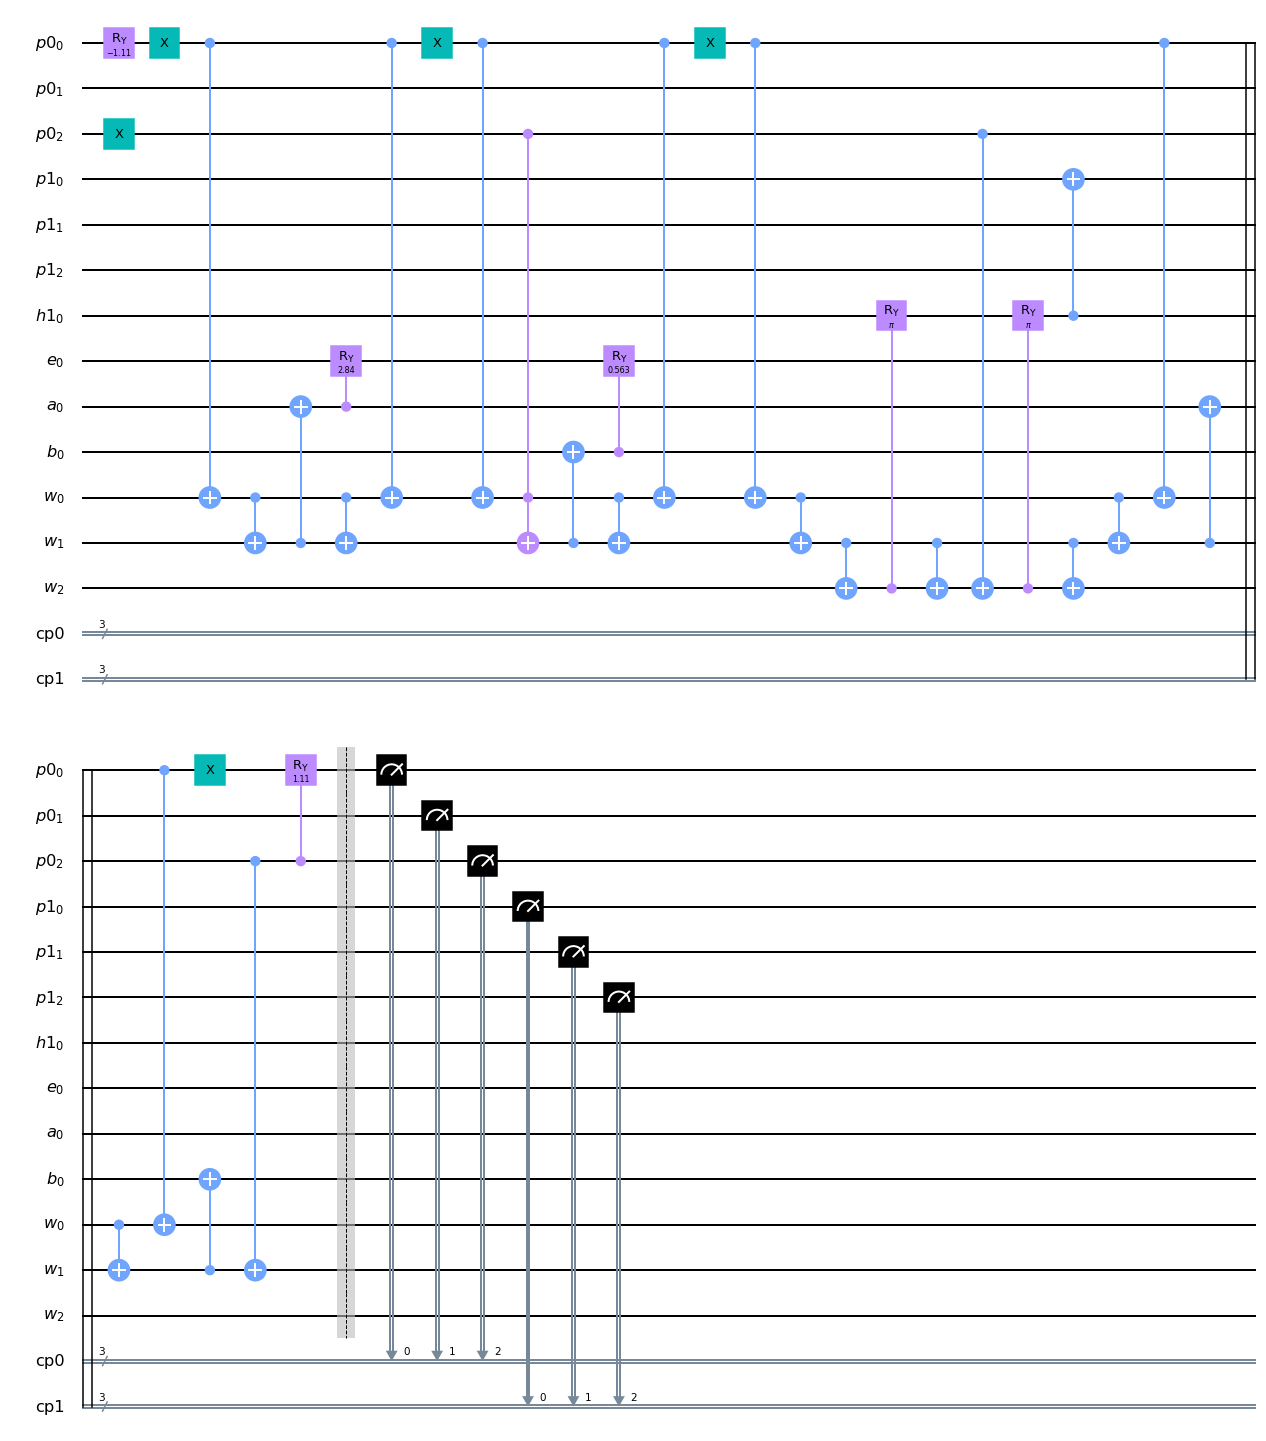

In [52]:
slimmed_by_qc5.draw(output='mpl')

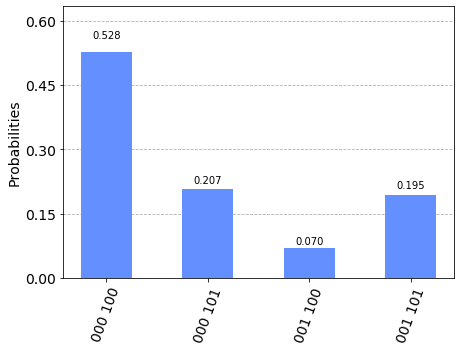

In [53]:
circuit=slimmed_by_qc5
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=2000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts,number_to_keep=None)

In [54]:
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

In [55]:
backend = provider.get_backend(qc)
example6 = slim.circuit_optimization( circuit = circuit_LBNL1 , slim_level = 1, cut = ['low',0.25], work_register = 'w')
slimmed_by_qc6, slimmed_dag6 = example6.slim_quantum(shots=8192 ,backend=backend)

               
  w_0: ────────
               
  w_1: ────────
               
  w_2: ────────
               
  w_3: ────────
               
 p0_0: ────────
               
 p0_1: ────────
       ┌───┐┌─┐
 p0_2: ┤ X ├┤M├
       └───┘└╥┘
 p1_0: ──────╫─
             ║ 
 p1_1: ──────╫─
             ║ 
 p1_2: ──────╫─
             ║ 
 h1_0: ──────╫─
             ║ 
  e_0: ──────╫─
             ║ 
phi_0: ──────╫─
             ║ 
  a_0: ──────╫─
             ║ 
  b_0: ──────╫─
             ║ 
 c1: 1/══════╩═
             0 
high: 4.803038381203805 mid: 3.602278785902854 low: 2.4015191906019027
Cut-off line: 409.6
Job Status: job has successfully run
Raw counts: {'0': 296, '1': 7896}
Job Status: job has successfully run
Mitigated counts {'1': 8192.0}
                              
  w_0: ───────────────────────
                              
  w_1: ───────────────────────
                              
  w_2: ───────────────────────
                              
  w_3: ──────────────────

high: 2555.9027201639647 mid: 1597.439200102478 low: 638.9756800409912
Cut-off line: 638.9756800409912
Job Status: job has successfully run
Raw counts: {'00': 739, '01': 681, '10': 3505, '11': 3267}
Job Status: job has successfully run
Mitigated counts {'00': 489.9721648486787, '10': 3372.9390160331395, '11': 4329.088819122807}
                           ┌───┐               ┌───┐        
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├────────
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘        
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼──────────
                             │  └───┘  │  └─┬─┘  │          
  w_2: ──────────────────────┼─────────┼────┼────┼──────────
                             │         │    │    │          
  w_3: ──────────────────────┼─────────┼────┼────┼──────────
       ┌─────────────┐┌───┐  │         │    │    │  ┌───┐┌─┐
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─────────┼────┼────■──┤ X ├┤M├
       └────┬───┬────┘└┬─┬┘            │    │       └───┘└╥┘

high: 3406.7853612794606 mid: 2129.240850799663 low: 851.6963403198652
Cut-off line: 851.6963403198652
Job Status: job has successfully run
Raw counts: {'00': 643, '01': 4546, '10': 440, '11': 2563}
Job Status: job has successfully run
Mitigated counts {'00': 584.1367463196112, '01': 4643.595329458365, '10': 396.4346188970447, '11': 2567.83330532498}
                           ┌───┐               ┌───┐     ┌───┐               
  w_0: ────────────────────┤ X ├──■─────────■──┤ X ├─────┤ X ├──■─────────■──
                           └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘     └─┬─┘┌─┴─┐     ┌─┴─┐
  w_1: ──────────────────────┼──┤ X ├──■──┤ X ├──┼─────────┼──┤ X ├──■──┤ X ├
                             │  └───┘  │  └─┬─┘  │         │  └───┘  │  └───┘
  w_2: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
                             │         │    │    │         │         │       
  w_3: ──────────────────────┼─────────┼────┼────┼─────────┼─────────┼───────
       ┌─────────────┐┌

high: 4074.0458314075804 mid: 3055.5343735556853 low: 2037.0229157037902
Cut-off line: 2037.0229157037902
Job Status: job has successfully run
Raw counts: {'0': 4577, '1': 3615}
Job Status: job has successfully run
Mitigated counts {'0': 4531.418052792822, '1': 3660.5819472071785}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1

high: 4980.934935338174 mid: 3113.0843345863586 low: 1245.2337338345435
Cut-off line: 1245.2337338345435
Job Status: job has successfully run
Raw counts: {'00': 613, '01': 3384, '10': 673, '11': 3522}
Job Status: job has successfully run
Mitigated counts {'00': 118.03057943620405, '01': 3811.793061679559, '10': 164.2771457041728, '11': 4097.899213180065}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────────

high: 5794.083237260595 mid: 4345.562427945446 low: 2897.0416186302973
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 5922, '1': 2270}
Job Status: job has successfully run
Mitigated counts {'0': 6075.624801271179, '1': 2116.375198728821}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■─

high: 6142.824508469932 mid: 3839.2653177937073 low: 1535.706127117483
Cut-off line: 1535.706127117483
Job Status: job has successfully run
Raw counts: {'00': 1187, '01': 3280, '10': 963, '11': 2762}
Job Status: job has successfully run
Mitigated counts {'00': 840.4774124419998, '01': 3604.2456621831398, '10': 674.2123604369722, '11': 3073.0645649378885}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────────

high: 6444.5988963137015 mid: 4027.8743101960636 low: 1611.1497240784254
Cut-off line: 1611.1497240784254
Job Status: job has successfully run
Raw counts: {'00': 2047, '01': 2186, '10': 2779, '11': 1180}
Job Status: job has successfully run
Mitigated counts {'00': 1862.1197355875863, '01': 2159.7927784965605, '10': 2965.5957898110332, '11': 1204.491696104821}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌──────

high: 6222.07301288102 mid: 3888.7956330506377 low: 1555.518253220255
Cut-off line: 1555.518253220255
Job Status: job has successfully run
Raw counts: {'00': 2660, '01': 1823, '10': 2078, '11': 1631}
Job Status: job has successfully run
Mitigated counts {'00': 2626.5369921698975, '01': 1837.7557530020838, '10': 2039.3556028453331, '11': 1688.3516519826862}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────

high: 6999.904440895809 mid: 4374.94027555988 low: 1749.9761102239522
Cut-off line: 1749.9761102239522
Job Status: job has successfully run
Raw counts: {'00': 2198, '01': 1869, '10': 2382, '11': 1743}
Job Status: job has successfully run
Mitigated counts {'00': 1995.337091033878, '01': 1893.5547278896697, '10': 2383.728648035619, '11': 1919.3795330408338}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌──────────

high: 6908.345243694981 mid: 4317.715777309363 low: 1727.0863109237453
Cut-off line: 1727.0863109237453
Job Status: job has successfully run
Raw counts: {'00': 2725, '01': 1325, '10': 3008, '11': 1134}
Job Status: job has successfully run
Mitigated counts {'00': 2623.941228521124, '01': 1337.5121820672664, '10': 3052.2876301965766, '11': 1178.2589592150332}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 6933.499571105583 mid: 4333.4372319409895 low: 1733.3748927763957
Cut-off line: 1733.3748927763957
Job Status: job has successfully run
Raw counts: {'00': 2147, '01': 1685, '10': 2381, '11': 1979}
Job Status: job has successfully run
Mitigated counts {'00': 2030.419355992129, '01': 1754.5589466725144, '10': 2297.4202509479496, '11': 2109.601446387407}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 7229.430295696054 mid: 4518.393934810034 low: 1807.3575739240134
Cut-off line: 1807.3575739240134
Job Status: job has successfully run
Raw counts: {'00': 2410, '01': 2633, '10': 1309, '11': 1840}
Job Status: job has successfully run
Mitigated counts {'00': 2249.504843088554, '01': 2655.3528336717554, '10': 1251.3205745861599, '11': 2035.821748653531}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────

high: 7503.3531344010935 mid: 4689.595709000683 low: 1875.8382836002734
Cut-off line: 1875.8382836002734
Job Status: job has successfully run
Raw counts: {'00': 1217, '01': 1317, '10': 2657, '11': 3001}
Job Status: job has successfully run
Mitigated counts {'00': 873.985268213191, '01': 1038.6044591767497, '10': 2779.9314318137376, '11': 3499.478840796322}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────

high: 7634.887048066719 mid: 4771.804405041699 low: 1908.7217620166798
Cut-off line: 1908.7217620166798
Job Status: job has successfully run
Raw counts: {'00': 2301, '01': 1600, '10': 2681, '11': 1610}
Job Status: job has successfully run
Mitigated counts {'00': 2256.537622720143, '01': 1603.8920777681437, '10': 2697.6245377608807, '11': 1633.9457617508324}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌────────

high: 7467.689300895503 mid: 5600.766975671628 low: 3733.8446504477515
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 4400, '1': 3792}
Job Status: job has successfully run
Mitigated counts {'0': 4375.914730741964, '1': 3816.0852692580347}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■

high: 7504.001363881248 mid: 4690.00085242578 low: 1876.000340970312
Cut-off line: 1876.000340970312
Job Status: job has successfully run
Raw counts: {'00': 1352, '01': 2380, '10': 2017, '11': 2443}
Job Status: job has successfully run
Mitigated counts {'00': 1144.9216792746201, '01': 2536.8112811604765, '10': 1890.0566830884406, '11': 2620.210356476464}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────────

high: 7540.811093499332 mid: 4713.006933437083 low: 1885.202773374833
Cut-off line: 1885.202773374833
Job Status: job has successfully run
Raw counts: {'00': 1866, '01': 1837, '10': 2284, '11': 2205}
Job Status: job has successfully run
Mitigated counts {'00': 1554.388382649624, '01': 1699.5022690971703, '10': 2366.693423021029, '11': 2571.4159252321765}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌───────────

high: 7415.695400888376 mid: 5561.771550666282 low: 3707.847700444188
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 4128, '1': 4064}
Job Status: job has successfully run
Mitigated counts {'0': 3983.0539881923582, '1': 4208.94601180764}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■──

high: 7721.565300682512 mid: 5791.173975511884 low: 3860.782650341256
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 4087, '1': 4105}
Job Status: job has successfully run
Mitigated counts {'0': 4018.934596981723, '1': 4173.065403018276}
                           ┌───┐                        ┌───┐     ┌───┐     »
  w_0: ────────────────────┤ X ├──■─────────────■───────┤ X ├─────┤ X ├──■──»
                           └─┬─┘┌─┴─┐         ┌─┴─┐     └─┬─┘     └─┬─┘┌─┴─┐»
  w_1: ──────────────────────┼──┤ X ├──■──────┤ X ├───────┼─────────┼──┤ X ├»
                             │  └───┘  │      └─┬─┘       │         │  └───┘»
  w_2: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
                             │         │        │         │         │       »
  w_3: ──────────────────────┼─────────┼────────┼─────────┼─────────┼───────»
       ┌─────────────┐┌───┐  │         │        │         │  ┌───┐  │       »
 p0_0: ┤ RY(-1.1071) ├┤ X ├──■──

high: 7788.277594801046 mid: 5841.208196100784 low: 3894.138797400523
Cut-off line: 2048.0
Job Status: job has successfully run
Raw counts: {'0': 7039, '1': 1153}
Job Status: job has successfully run
Mitigated counts {'0': 7086.293035645254, '1': 1105.7069643547454}


In [ ]:
409.6,409.6,409.6,409.6,409.6,638.9756800409912,653.7722944212207,666.2846558091546,1321.0765736884186,851.6963403198652,975.1458673302132,1892.202364521243,2037.0229157037902,1039.7082392434972,1245.2337338345435,1270.771614783037,2048.0,1497.4983876346173,1535.706127117483,1537.3707606137787,1611.1497240784254,1647.3124864380873,1555.518253220255,2048.0,1749.9761102239522,1732.4082922895402,1727.0863109237453,1735.2391922670377,1733.3748927763957,2048.0,1807.3575739240134,1829.2399584576303,1875.8382836002734,1908.7217620166798,2048.0,1876.000340970312,1885.202773374833,2048.0,2048.0

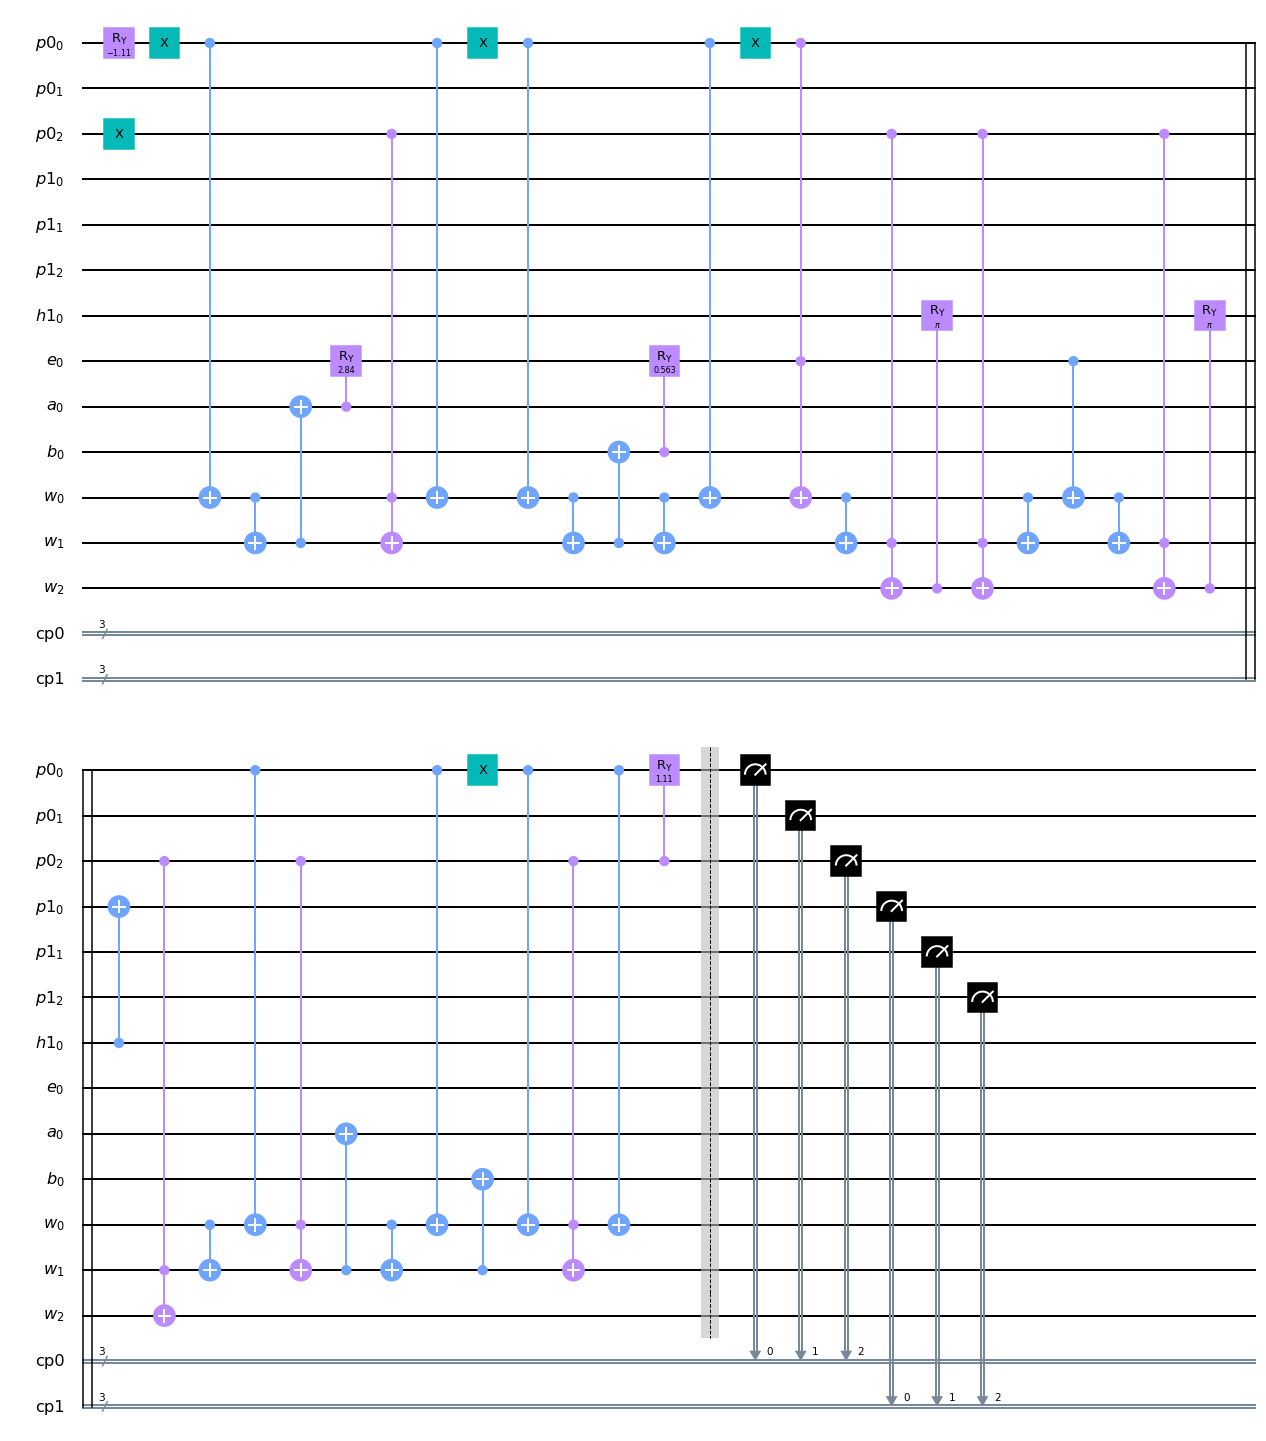

In [56]:
slimmed_by_qc6.draw(output='mpl')

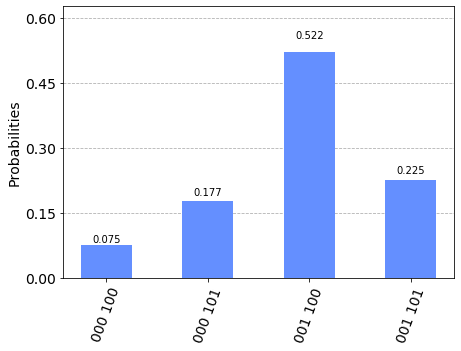

In [57]:
circuit=slimmed_by_qc6
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=2000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts,number_to_keep=None)

# Experiment by qc = 'ibmq_sydney'

In [80]:
new_circ_lv3_qc = transpile(slimmed_by_qc, backend=backend, optimization_level=3)
        
for _ in range(10):
    candidate = transpile(slimmed_by_qc, backend=backend, optimization_level=3)
    if candidate.__len__() < new_circ_lv3_qc.__len__():
        new_circ_lv3_qc = candidate
        
print(new_circ_lv3_qc.depth(), ',', new_circ_lv3_qc.__len__())
print('Gate counts:', new_circ_lv3_qc.count_ops())

44 , 75
Gate counts: OrderedDict([('cx', 46), ('u2', 10), ('u3', 6), ('u1', 6), ('measure', 6), ('barrier', 1)])


In [81]:
new_circ_lv3_qc2 = transpile(slimmed_by_qc2, backend=backend, optimization_level=3)
        
for _ in range(10):
    candidate = transpile(slimmed_by_qc2, backend=backend, optimization_level=3)
    if candidate.__len__() < new_circ_lv3_qc2.__len__():
        new_circ_lv3_qc2 = candidate
        
print(new_circ_lv3_qc2.depth(), ',', new_circ_lv3_qc2.__len__())
print('Gate counts:', new_circ_lv3_qc2.count_ops())

54 , 103
Gate counts: OrderedDict([('cx', 70), ('u3', 15), ('u2', 6), ('measure', 6), ('u1', 5), ('barrier', 1)])


In [82]:
new_circ_lv3_qc3 = transpile(slimmed_by_qc3, backend=backend, optimization_level=3)
        
for _ in range(10):
    candidate = transpile(slimmed_by_qc3, backend=backend, optimization_level=3)
    if candidate.__len__() < new_circ_lv3_qc3.__len__():
        new_circ_lv3_qc3 = candidate
        
print(new_circ_lv3_qc3.depth(), ',', new_circ_lv3_qc3.__len__())
print('Gate counts:', new_circ_lv3_qc3.count_ops())

107 , 196
Gate counts: OrderedDict([('cx', 131), ('u2', 35), ('u3', 14), ('u1', 9), ('measure', 6), ('barrier', 1)])


In [83]:
new_circ_lv3_qc3_2 = transpile(slimmed_by_qc3_2, backend=backend, optimization_level=3)
        
for _ in range(10):
    candidate = transpile(slimmed_by_qc3_2, backend=backend, optimization_level=3)
    if candidate.__len__() < new_circ_lv3_qc3_2.__len__():
        new_circ_lv3_qc3_2 = candidate
        
print(new_circ_lv3_qc3_2.depth(), ',', new_circ_lv3_qc3_2.__len__())
print('Gate counts:', new_circ_lv3_qc3_2.count_ops())

179 , 311
Gate counts: OrderedDict([('cx', 213), ('u2', 49), ('u3', 21), ('u1', 21), ('measure', 6), ('barrier', 1)])


In [84]:
new_circ_lv3_qc3_3 = transpile(slimmed_by_qc3_3, backend=backend, optimization_level=3)
        
for _ in range(10):
    candidate = transpile(slimmed_by_qc3_3, backend=backend, optimization_level=3)
    if candidate.__len__() < new_circ_lv3_qc3_3.__len__():
        new_circ_lv3_qc3_3 = candidate
        
print(new_circ_lv3_qc3_3.depth(), ',', new_circ_lv3_qc3_3.__len__())
print('Gate counts:', new_circ_lv3_qc3_3.count_ops())

195 , 349
Gate counts: OrderedDict([('cx', 217), ('u2', 77), ('u1', 30), ('u3', 18), ('measure', 6), ('barrier', 1)])


In [85]:
new_circ_lv3_qc3_4 = transpile(slimmed_by_qc3_4, backend=backend, optimization_level=3)
        
for _ in range(10):
    candidate = transpile(slimmed_by_qc3_4, backend=backend, optimization_level=3)
    if candidate.__len__() < new_circ_lv3_qc3_4.__len__():
        new_circ_lv3_qc3_4 = candidate
        
print(new_circ_lv3_qc3_4.depth(), ',', new_circ_lv3_qc3_4.__len__())
print('Gate counts:', new_circ_lv3_qc3_4.count_ops())

184 , 325
Gate counts: OrderedDict([('cx', 202), ('u2', 69), ('u1', 27), ('u3', 20), ('measure', 6), ('barrier', 1)])


In [86]:
new_circ_lv3_qc3_5 = transpile(slimmed_by_qc3_5, backend=backend, optimization_level=3)
        
for _ in range(10):
    candidate = transpile(slimmed_by_qc3_5, backend=backend, optimization_level=3)
    if candidate.__len__() < new_circ_lv3_qc3_5.__len__():
        new_circ_lv3_qc3_5 = candidate
        
print(new_circ_lv3_qc3_5.depth(), ',', new_circ_lv3_qc3_5.__len__())
print('Gate counts:', new_circ_lv3_qc3_5.count_ops())

173 , 304
Gate counts: OrderedDict([('cx', 195), ('u2', 62), ('u1', 24), ('u3', 16), ('measure', 6), ('barrier', 1)])


In [87]:
new_circ_lv3_qc4 = transpile(slimmed_by_qc4, backend=backend, optimization_level=3)
        
for _ in range(10):
    candidate = transpile(slimmed_by_qc4, backend=backend, optimization_level=3)
    if candidate.__len__() < new_circ_lv3_qc4.__len__():
        new_circ_lv3_qc4 = candidate
        
print(new_circ_lv3_qc4.depth(), ',', new_circ_lv3_qc4.__len__())
print('Gate counts:', new_circ_lv3_qc4.count_ops())

107 , 197
Gate counts: OrderedDict([('cx', 130), ('u2', 35), ('u3', 17), ('u1', 8), ('measure', 6), ('barrier', 1)])


In [88]:
new_circ_lv3_qc5 = transpile(slimmed_by_qc5, backend=backend, optimization_level=3)
        
for _ in range(10):
    candidate = transpile(slimmed_by_qc5, backend=backend, optimization_level=3)
    if candidate.__len__() < new_circ_lv3_qc5.__len__():
        new_circ_lv3_qc5 = candidate
        
print(new_circ_lv3_qc5.depth(), ',', new_circ_lv3_qc5.__len__())
print('Gate counts:', new_circ_lv3_qc5.count_ops())

102 , 204
Gate counts: OrderedDict([('cx', 139), ('u2', 34), ('u3', 15), ('u1', 9), ('measure', 6), ('barrier', 1)])


In [89]:
new_circ_lv3_qc6 = transpile(slimmed_by_qc6, backend=backend, optimization_level=3)
        
for _ in range(10):
    candidate = transpile(slimmed_by_qc6, backend=backend, optimization_level=3)
    if candidate.__len__() < new_circ_lv3_qc6.__len__():
        new_circ_lv3_qc6 = candidate
        
print(new_circ_lv3_qc6.depth(), ',', new_circ_lv3_qc6.__len__())
print('Gate counts:', new_circ_lv3_qc6.count_ops())

242 , 405
Gate counts: OrderedDict([('cx', 256), ('u2', 82), ('u1', 37), ('u3', 23), ('measure', 6), ('barrier', 1)])


In [76]:
from qiskit.tools.monitor import job_monitor

In [77]:
from collections import Counter

def merge_dict(d1, d2):
    c1 = Counter(d1)
    c2 = Counter(d2)
    return dict(c1 + c2)

In [90]:
circ_list1=[]
for _ in range(10):
    circ_list1.append(new_circ_lv3_qc)

job1 = execute(circ_list1, backend=provider.get_backend(qc), shots = 8192)
job_monitor(job1)
counts1 = job1.result().get_counts()

sum_dic=[]
for dic in counts1:
    sum_dic = merge_dict(sum_dic, dic)
print(sum_dic)

Job Status: job has successfully run
{'000 000': 5128, '000 001': 4176, '010 001': 24, '010 100': 147, '010 101': 143, '000 010': 246, '100 000': 946, '100 001': 816, '100 010': 54, '100 011': 38, '100 100': 3352, '100 101': 2801, '100 110': 152, '100 111': 136, '101 000': 71, '101 001': 41, '101 010': 2, '101 100': 262, '101 101': 219, '101 111': 11, '000 011': 189, '110 100': 18, '110 101': 15, '000 100': 32179, '000 101': 26281, '000 110': 1563, '000 111': 1277, '001 000': 139, '001 001': 106, '001 010': 7, '001 100': 678, '001 101': 555, '001 110': 35, '001 111': 31, '010 000': 22, '010 010': 1, '010 110': 7, '010 111': 3, '011 101': 1, '101 110': 15, '110 001': 8, '001 011': 7, '110 000': 6, '011 001': 2, '110 011': 4, '011 100': 3, '111 100': 3}


In [91]:
circ_list2=[]
for _ in range(10):
    circ_list2.append(new_circ_lv3_qc2)

job2 = execute(circ_list2, backend=provider.get_backend(qc), shots = 8192)
job_monitor(job2)
counts2 = job2.result().get_counts()

sum_dic=[]
for dic in counts2:
    sum_dic = merge_dict(sum_dic, dic)
print(sum_dic)

Job Status: job has successfully run
{'000 000': 3470, '000 001': 2406, '010 000': 276, '010 001': 185, '010 011': 8, '010 100': 400, '010 101': 258, '010 110': 13, '011 000': 622, '011 001': 435, '011 010': 19, '011 011': 10, '011 100': 963, '011 101': 633, '011 110': 12, '011 111': 12, '000 010': 71, '100 000': 103, '100 001': 81, '100 100': 258, '100 101': 156, '100 111': 10, '101 000': 233, '101 001': 154, '101 100': 559, '101 101': 386, '000 011': 52, '110 001': 9, '111 000': 14, '111 100': 24, '111 101': 22, '000 100': 9356, '000 101': 6775, '000 110': 189, '000 111': 148, '001 000': 8477, '001 001': 5855, '001 010': 138, '001 011': 81, '001 100': 22946, '001 101': 15314, '001 110': 407, '001 111': 295, '010 010': 8, '010 111': 6, '100 010': 1, '101 010': 3, '101 011': 3, '101 110': 7, '100 110': 5, '101 111': 13, '110 000': 5, '111 001': 11, '110 100': 11, '110 101': 9, '100 011': 1, '111 010': 1, '111 011': 1}


In [92]:
circ_list3=[]
for _ in range(10):
    circ_list3.append(new_circ_lv3_qc3)

job3 = execute(circ_list3, backend=provider.get_backend(qc), shots = 8192)
job_monitor(job3)
counts3 = job3.result().get_counts()

sum_dic=[]
for dic in counts3:
    sum_dic = merge_dict(sum_dic, dic)
print(sum_dic)

Job Status: job has successfully run
{'000 000': 1833, '000 001': 2017, '010 000': 97, '010 001': 109, '010 010': 2, '010 100': 382, '010 101': 399, '010 110': 9, '010 111': 12, '011 000': 5, '011 100': 23, '011 111': 1, '000 010': 38, '100 000': 43, '100 001': 29, '100 100': 701, '100 101': 728, '100 110': 19, '100 111': 21, '101 100': 32, '101 101': 43, '000 011': 44, '110 000': 2, '110 100': 3, '110 101': 10, '000 100': 33210, '000 101': 36011, '000 110': 793, '000 111': 894, '001 000': 95, '001 001': 131, '001 100': 1937, '001 101': 2105, '001 110': 56, '001 111': 33, '011 001': 7, '011 101': 30, '011 110': 1, '010 011': 2, '101 001': 3, '110 001': 2, '111 100': 1, '001 011': 2, '011 011': 1, '001 010': 2, '101 000': 1, '100 011': 1}


In [93]:
circ_list3_2=[]
for _ in range(10):
    circ_list3_2.append(new_circ_lv3_qc3_2)

job3_2 = execute(circ_list3_2, backend=provider.get_backend(qc), shots = 8192)
job_monitor(job3_2)
counts3_2 = job3_2.result().get_counts()

sum_dic=[]
for dic in counts3_2:
    sum_dic = merge_dict(sum_dic, dic)
print(sum_dic)

Job Status: job has successfully run
{'000 000': 9343, '000 001': 23234, '010 000': 938, '010 001': 2127, '010 010': 78, '010 011': 222, '010 100': 1094, '010 101': 1481, '010 110': 121, '010 111': 124, '011 000': 100, '011 001': 227, '011 010': 21, '011 011': 59, '011 100': 112, '011 101': 160, '011 110': 25, '011 111': 33, '000 010': 839, '100 000': 219, '100 001': 484, '100 010': 15, '100 011': 54, '100 100': 288, '100 101': 298, '100 110': 18, '100 111': 32, '101 000': 23, '101 001': 55, '101 100': 23, '101 101': 39, '101 111': 8, '000 011': 2044, '110 001': 54, '110 011': 4, '110 100': 23, '110 101': 33, '111 001': 5, '000 100': 12179, '000 101': 15961, '000 110': 1084, '000 111': 1446, '001 000': 928, '001 001': 2220, '001 010': 201, '001 011': 484, '001 100': 1153, '001 101': 1565, '001 110': 245, '001 111': 345, '101 010': 4, '101 011': 7, '110 000': 24, '110 010': 1, '110 110': 2, '111 100': 4, '111 101': 1, '101 110': 3, '111 111': 1, '110 111': 3, '111 000': 1, '111 010': 1}

In [94]:
circ_list3_3=[]
for _ in range(10):
    circ_list3_3.append(new_circ_lv3_qc3_3)

job3_3 = execute(circ_list3_3, backend=provider.get_backend(qc), shots = 8192)
job_monitor(job3_3)
counts3_3 = job3_3.result().get_counts()

sum_dic=[]
for dic in counts3_3:
    sum_dic = merge_dict(sum_dic, dic)
print(sum_dic)

Job Status: job has successfully run
{'000 000': 14449, '000 001': 22182, '010 000': 910, '010 001': 1352, '010 010': 110, '010 011': 178, '010 100': 571, '010 101': 885, '010 110': 76, '010 111': 131, '011 000': 59, '011 001': 95, '011 010': 11, '011 011': 14, '011 100': 34, '011 101': 51, '000 010': 1864, '100 000': 388, '100 001': 638, '100 010': 44, '100 011': 76, '100 100': 271, '100 101': 412, '100 110': 37, '100 111': 56, '101 000': 33, '101 001': 37, '101 011': 6, '101 100': 23, '101 101': 43, '000 011': 2776, '110 000': 17, '110 001': 31, '110 100': 9, '110 101': 25, '110 111': 5, '111 101': 3, '000 100': 10196, '000 101': 15425, '000 110': 1371, '000 111': 1919, '001 000': 1084, '001 001': 1588, '001 010': 124, '001 011': 209, '001 100': 724, '001 101': 1124, '001 110': 78, '001 111': 140, '111 000': 2, '111 100': 1, '011 110': 5, '011 111': 9, '110 011': 2, '101 010': 6, '101 111': 5, '110 110': 1, '111 001': 2, '101 110': 2, '110 010': 1}


In [95]:
circ_list3_4=[]
for _ in range(10):
    circ_list3_4.append(new_circ_lv3_qc3_4)

job3_4 = execute(circ_list3_4, backend=provider.get_backend(qc), shots = 8192)
job_monitor(job3_4)
counts3_4 = job3_4.result().get_counts()

sum_dic=[]
for dic in counts3_4:
    sum_dic = merge_dict(sum_dic, dic)
print(sum_dic)

Job Status: job has successfully run
{'000 000': 9978, '000 001': 12076, '010 000': 826, '010 001': 1030, '010 010': 18, '010 011': 23, '010 100': 515, '010 101': 556, '011 000': 800, '011 001': 1035, '011 010': 22, '011 011': 22, '011 100': 512, '011 101': 527, '011 110': 6, '011 111': 8, '000 010': 182, '100 000': 287, '100 001': 311, '100 100': 218, '100 101': 240, '101 000': 234, '101 001': 306, '101 011': 6, '101 100': 190, '101 101': 214, '000 011': 229, '110 000': 23, '110 001': 33, '110 100': 10, '111 000': 22, '111 001': 24, '111 100': 10, '111 101': 17, '000 100': 7338, '000 101': 7673, '000 110': 142, '000 111': 167, '001 000': 9487, '001 001': 11695, '001 010': 157, '001 011': 204, '001 100': 6856, '001 101': 7345, '001 110': 130, '001 111': 141, '100 010': 8, '100 011': 7, '101 010': 7, '111 010': 1, '111 011': 1, '010 110': 9, '010 111': 10, '100 110': 5, '110 101': 12, '110 010': 2, '101 110': 5, '100 111': 6, '101 111': 2}


In [96]:
circ_list3_5=[]
for _ in range(10):
    circ_list3_5.append(new_circ_lv3_qc3_5)

job3_5 = execute(circ_list3_5, backend=provider.get_backend(qc), shots = 8192)
job_monitor(job3_5)
counts3_5 = job3_5.result().get_counts()

sum_dic=[]
for dic in counts3_5:
    sum_dic = merge_dict(sum_dic, dic)
print(sum_dic)

Job Status: job has successfully run
{'000 000': 10713, '000 001': 10519, '010 000': 572, '010 001': 580, '010 011': 14, '010 100': 497, '010 101': 498, '011 000': 557, '011 001': 559, '011 010': 11, '011 011': 11, '011 100': 462, '011 101': 497, '011 110': 8, '011 111': 5, '000 010': 195, '100 000': 224, '100 001': 213, '100 100': 169, '100 101': 192, '100 110': 4, '101 000': 219, '101 001': 214, '101 011': 5, '101 100': 163, '101 101': 182, '000 011': 201, '110 000': 17, '110 001': 19, '110 100': 7, '110 101': 10, '111 100': 8, '000 100': 8772, '000 101': 8610, '000 110': 212, '000 111': 145, '001 000': 10220, '001 001': 9472, '001 010': 213, '001 011': 187, '001 100': 8262, '001 101': 7880, '001 110': 157, '001 111': 149, '010 010': 14, '010 110': 12, '100 011': 5, '101 111': 7, '111 000': 14, '111 001': 11, '111 101': 10, '010 111': 9, '100 111': 1, '101 010': 7, '110 010': 2, '110 110': 1, '100 010': 3}


In [97]:
circ_list4=[]
for _ in range(10):
    circ_list4.append(new_circ_lv3_qc4)

job4 = execute(circ_list4, backend=provider.get_backend(qc), shots = 8192)
job_monitor(job4)
counts4 = job4.result().get_counts()

sum_dic=[]
for dic in counts4:
    sum_dic = merge_dict(sum_dic, dic)
print(sum_dic)

Job Status: job has successfully run
{'000 000': 9254, '000 001': 11355, '010 000': 856, '010 001': 1118, '010 011': 35, '010 100': 570, '010 101': 646, '010 110': 14, '010 111': 16, '011 000': 716, '011 001': 696, '011 011': 17, '011 100': 454, '011 101': 411, '011 110': 8, '011 111': 5, '000 010': 188, '100 000': 295, '100 001': 309, '100 010': 5, '100 100': 280, '100 101': 288, '100 110': 7, '100 111': 7, '101 000': 235, '101 001': 189, '101 011': 6, '101 100': 186, '101 101': 210, '000 011': 231, '110 001': 24, '110 100': 16, '110 101': 18, '111 000': 19, '111 001': 21, '111 100': 11, '111 101': 15, '000 100': 10471, '000 101': 11019, '000 110': 202, '000 111': 218, '001 000': 8177, '001 001': 6888, '001 010': 169, '001 011': 138, '001 100': 8377, '001 101': 7152, '001 110': 171, '001 111': 143, '010 010': 14, '110 000': 21, '110 011': 1, '011 010': 11, '100 011': 6, '101 010': 1, '101 110': 7, '101 111': 3}


In [98]:
circ_list5=[]
for _ in range(10):
    circ_list5.append(new_circ_lv3_qc5)

job5 = execute(circ_list5, backend=provider.get_backend(qc), shots = 8192)
job_monitor(job5)
counts5 = job5.result().get_counts()

sum_dic=[]
for dic in counts5:
    sum_dic = merge_dict(sum_dic, dic)
print(sum_dic)

Job Status: job has successfully run
{'000 000': 12251, '000 001': 8050, '010 000': 1839, '010 001': 1151, '010 010': 32, '010 011': 28, '010 100': 707, '010 101': 543, '010 110': 13, '010 111': 9, '011 000': 1778, '011 001': 1244, '011 010': 36, '011 011': 28, '011 100': 607, '011 101': 477, '000 010': 223, '100 000': 278, '100 001': 193, '100 100': 263, '100 101': 156, '101 000': 248, '101 001': 177, '101 010': 5, '101 100': 202, '101 101': 157, '000 011': 148, '110 000': 43, '110 001': 27, '110 100': 22, '110 101': 12, '111 000': 37, '111 001': 27, '111 010': 1, '111 100': 19, '000 100': 9175, '000 101': 7012, '000 110': 170, '000 111': 123, '001 000': 11031, '001 001': 7658, '001 010': 201, '001 011': 134, '001 100': 8250, '001 101': 6806, '001 110': 155, '001 111': 115, '100 010': 8, '100 110': 3, '101 011': 7, '101 110': 3, '111 011': 2, '111 101': 10, '011 110': 11, '011 111': 6, '100 111': 3, '101 111': 4, '100 011': 1, '111 111': 1}


In [99]:
circ_list6=[]
for _ in range(10):
    circ_list6.append(new_circ_lv3_qc6)

job6 = execute(circ_list6, backend=provider.get_backend(qc), shots = 8192)
job_monitor(job6)
counts6 = job6.result().get_counts()

sum_dic=[]
for dic in counts6:
    sum_dic = merge_dict(sum_dic, dic)
print(sum_dic)

Job Status: job has successfully run
{'000 000': 6512, '000 001': 15547, '010 000': 803, '010 001': 1868, '010 010': 23, '010 011': 39, '010 100': 627, '010 101': 1071, '010 110': 12, '010 111': 21, '011 000': 850, '011 001': 1842, '011 011': 43, '011 100': 652, '011 101': 1016, '011 110': 13, '011 111': 16, '000 010': 142, '100 000': 173, '100 001': 397, '100 100': 139, '100 101': 226, '101 000': 164, '101 001': 421, '101 010': 1, '101 100': 123, '101 101': 198, '000 011': 291, '110 000': 17, '110 001': 56, '110 100': 19, '110 101': 26, '111 000': 20, '111 001': 62, '111 101': 16, '000 100': 5002, '000 101': 8253, '000 110': 112, '000 111': 168, '001 000': 6296, '001 001': 14857, '001 010': 113, '001 011': 299, '001 100': 5092, '001 101': 7996, '001 110': 80, '001 111': 138, '011 010': 13, '100 011': 8, '100 111': 5, '101 011': 11, '111 100': 15, '111 010': 1, '111 110': 2, '100 110': 2, '101 110': 1, '101 111': 1, '110 011': 3, '111 011': 3, '111 111': 1, '100 010': 2}


# Number of gate

In [100]:
raw_circuits = [slimmed_by_qc, slimmed_by_qc2, slimmed_by_qc3, slimmed_by_qc3_2, slimmed_by_qc3_3, slimmed_by_qc3_4, slimmed_by_qc3_5, slimmed_by_qc4, slimmed_by_qc5, slimmed_by_qc6]

In [101]:
transpiled_circuits = [new_circ_lv3_qc, new_circ_lv3_qc2, new_circ_lv3_qc3, new_circ_lv3_qc3_2, new_circ_lv3_qc3_3, new_circ_lv3_qc3_4, new_circ_lv3_qc3_5, new_circ_lv3_qc4, new_circ_lv3_qc5, new_circ_lv3_qc6]

In [102]:
qubits = []
for circ in raw_circuits:
    qubits.append(circ.num_qubits)
print(qubits)

[11, 13, 13, 13, 13, 13, 13, 13, 13, 13]


In [103]:
gates_num = []
for circ in transpiled_circuits:
    gates_num.append(circ.__len__())
print(gates_num)

[75, 103, 196, 311, 349, 325, 304, 197, 204, 405]


In [104]:
depth_list = []
for circ in transpiled_circuits:
    depth_list.append(circ.depth())
print(depth_list)

[44, 54, 107, 179, 195, 184, 173, 107, 102, 242]


In [105]:
for circ in transpiled_circuits:
    print(circ.count_ops())

OrderedDict([('cx', 46), ('u2', 10), ('u3', 6), ('u1', 6), ('measure', 6), ('barrier', 1)])
OrderedDict([('cx', 70), ('u3', 15), ('u2', 6), ('measure', 6), ('u1', 5), ('barrier', 1)])
OrderedDict([('cx', 131), ('u2', 35), ('u3', 14), ('u1', 9), ('measure', 6), ('barrier', 1)])
OrderedDict([('cx', 213), ('u2', 49), ('u3', 21), ('u1', 21), ('measure', 6), ('barrier', 1)])
OrderedDict([('cx', 217), ('u2', 77), ('u1', 30), ('u3', 18), ('measure', 6), ('barrier', 1)])
OrderedDict([('cx', 202), ('u2', 69), ('u1', 27), ('u3', 20), ('measure', 6), ('barrier', 1)])
OrderedDict([('cx', 195), ('u2', 62), ('u1', 24), ('u3', 16), ('measure', 6), ('barrier', 1)])
OrderedDict([('cx', 130), ('u2', 35), ('u3', 17), ('u1', 8), ('measure', 6), ('barrier', 1)])
OrderedDict([('cx', 139), ('u2', 34), ('u3', 15), ('u1', 9), ('measure', 6), ('barrier', 1)])
OrderedDict([('cx', 256), ('u2', 82), ('u1', 37), ('u3', 23), ('measure', 6), ('barrier', 1)])
